# CAPSTONE PROJECT-1 :- PCRP-1027-Skin Disorder

# PROJECT TEAM ID :- PTID-CDS-OCT-23-1659


## PROBLEM STATEMENT: 
#### Task 1:-Prepare a complete data analysis report on the given data.

#### Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

#### Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


#### AIM:
- The aim of using a machine learning model for skin disorder disease is to enhance diagnostic accuracy and streamline treatment recommendations, ultimately improving patient outcomes and reducing healthcare costs.

### Import Laibraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

In [2]:
Image('Screenshot (43).png')

FileNotFoundError: No such file or directory: 'Screenshot (43).png'

FileNotFoundError: No such file or directory: 'Screenshot (43).png'

<IPython.core.display.Image object>

#### Dataset Information:
**This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.**

- The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences.

- The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.

- Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. (Histopathology:The study of diseased cells and tissues using a microscope.)

- Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages.Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

- The values of the histopathological features are determined by an analysis of the samples under a microscope.

- In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

- The age feature simply represents the age of the patient.

- Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

- The names and id numbers of the patients were recently removed from the database .

### Load the Data

In [6]:
data=pd.read_csv('dataset_35_dermatology (1).csv')

In [7]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [8]:
data.shape

(366, 35)

### Domain Analysis

#### Brief Introduction about Skin Disorders

- Erythemato-squamous skin disorders are a group of dermatological conditions characterized by the presence of redness (erythema) and scaly or flaky skin (squamous). These conditions often share common features, such as inflammation and scaling of the skin, but they can vary in their underlying causes, clinical presentation, and severity. The diseases in this group include:

1. **Psoriasis**: Psoriasis is a chronic autoimmune condition that leads to the rapid growth of skin cells, resulting in thick, scaly, and often silvery plaques on the skin. It can affect various parts of the body and may cause itching and discomfort.

2. **Seborrheic Dermatitis**: This condition is characterized by red, itchy, and scaly patches on the scalp, face, and other oily areas of the skin. It is often associated with overactive sebaceous (oil) glands.

3. **Lichen Planus**: Lichen planus is an inflammatory skin condition that results in flat-topped, itchy, and purplish lesions on the skin or mucous membranes. It can affect various parts of the body.

4. **Pityriasis Rosea**: Pityriasis rosea is a self-limiting skin disorder that typically starts with a single, larger red or pink patch followed by the appearance of smaller, scaly lesions in a pattern resembling a "Christmas tree." It often resolves on its own.

5. **Chronic Dermatitis**: Chronic dermatitis refers to persistent inflammation of the skin, often due to various causes, such as allergies, irritants, or underlying medical conditions. It can lead to redness, itching, and skin thickening.

6. **Pityriasis Rubra Pilaris**: Pityriasis rubra pilaris is a rare, chronic skin disorder characterized by reddish-orange scaly patches on the skin, often with prominent areas of skin thickening. It typically affects the palms and soles as well.

- These erythemato-squamous skin disorders are diagnosed by dermatologists based on clinical examination, medical history, and sometimes skin biopsies. Treatment options vary depending on the specific condition and its severity and may include topical creams, oral medications, phototherapy, and lifestyle modifications. It's important for individuals with these conditions to seek professional medical advice for proper diagnosis and management. 

In [6]:
for i in data:
    print('The value counts of  column is:',data.value_counts(i))
    print('***********************')

The value counts of  column is: erythema
2    215
3     90
1     57
0      4
dtype: int64
***********************
The value counts of  column is: scaling
2    195
1    111
3     52
0      8
dtype: int64
***********************
The value counts of  column is: definite_borders
2    168
1     93
0     59
3     46
dtype: int64
***********************
The value counts of  column is: itching
0    118
2    100
3     76
1     72
dtype: int64
***********************
The value counts of  column is: koebner_phenomenon
0    224
1     70
2     54
3     18
dtype: int64
***********************
The value counts of  column is: polygonal_papules
0    297
2     41
3     27
1      1
dtype: int64
***********************
The value counts of  column is: follicular_papules
0    333
2     16
1     11
3      6
dtype: int64
***********************
The value counts of  column is: oral_mucosal_involvement
0    299
2     45
3     13
1      9
dtype: int64
***********************
The value counts of  column is: knee_

### Introduction about each Attributes
#### Clinical Attributes:
- These clinical attributes are important for dermatologists to assess and diagnose various skin conditions accurately. They are used in clinical examinations and research to characterize the presentation and progression of dermatological diseases. Researchers and healthcare providers can analyze these attributes to understand patterns and correlations in different skin conditions and to develop treatment plans tailored to individual patients.

1. **Erythema**: Erythema refers to redness of the skin due to increased blood flow, often seen in various skin conditions.Here, 0 indicates that the Erythema was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.


2. **Scaling**: Scaling is the shedding of the outer layer of skin, resulting in the formation of flakes or scales on the skin's surface.Here,0 indicates that the Scaling was not present, 3 indicates the largest amount of Scaling is possible, and 1, 2 indicate the relative intermediate Scaling.

3. **Definite Borders**: This term indicates that a skin lesion or rash has well-defined and clear boundaries.Here,0 indicates that the rashes are not present, 3 indicates the largest amount of rashes are possible, and 1, 2 indicate the relative intermediate rashes.

4. **Itching**: Itching, or pruritus, is a sensation that prompts the desire to scratch the skin and is a common symptom in many skin disorders.Here,0 indicates that the itching was not present, 3 indicates the largest amount itching, and 1, 2 indicate the relative intermediate itching.

5. **Koebner Phenomenon**: This phenomenon refers to the development of skin lesions in areas of skin trauma or injury.Here,0 indicates that there is no injury, 3 indicates the largest amount of injury, and 1, 2 indicates the intermediate injury.

6. **Polygonal Papules**: Polygonal papules are raised, flat-topped skin lesions with multiple straight sides, often seen in some skin conditions.Here,0 indicates that the  was not present Polygonal papules, 3 indicates the largest amount of papules possible, and 1, 2 indicate the relative intermediate values.

7. **Follicular Papules**: These are small, raised bumps that originate from hair follicles and can be associated with various skin conditions.Here, 0 indicates that the Follicular Papules was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative. 

8. **Oral Mucosal Involvement**: It indicates the presence of symptoms or lesions in the mucous membranes of the mouth.Here, 0 indicates that the oral mucosal was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative. 

9. **Knee and Elbow Involvement**: Some skin disorders may specifically affect the skin over the knees and elbows, leading to characteristic changes.Here, 0 indicates that knee involvement was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

10. **Scalp Involvement**: This term signifies that a skin condition affects the scalp, leading to symptoms or skin changes in that area.Here, 0 indicates that scalp involvement was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

11. **Family History**: Family history refers to a person's genetic predisposition to a particular condition due to its occurrence in their family members.Here, family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

12. **Age**: Age refers to the chronological age of an individual and can be an important factor in understanding the onset and progression of skin disorders.The age feature simply represents the age of the patient.

#### Histopathological Attributes:
- These histopathological attributes provide crucial information for dermatopathologists and researchers to diagnose and classify various skin disorders accurately. They aid in understanding the underlying histological changes associated with different dermatological conditions.

13. **Eosinophils in the Infiltrate**: Eosinophils are a type of white blood cell that can be found in the inflammatory infiltrate or accumulation of cells in skin tissues.Here, 0 indicates that Eosinophils was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

14. **PNL Infiltrate**: PNL infiltrate may refer to the presence of polymorphonuclear leukocytes (a type of white blood cell) in the skin infiltrate, indicating inflammation.Here, 0 indicates that polymorphonuclear leukocytes was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

15. **Fibrosis of the Papillary Dermis**: This term suggests the thickening and scarring of the papillary dermis, which is the upper layer of the skin's dermis.Here, 0 indicates that thickening and scarring of the papillary dermis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

16. **Exocytosis**: Exocytosis is the process of cells releasing substances, such as immune cells moving from blood vessels into the skin.0 indicates that Exocytosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

17. **Acanthosis**: Acanthosis is the thickening of the epidermis, the outermost layer of the skin.Here, 0 indicates that Acanthosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


18. **Hyperkeratosis**: Hyperkeratosis is the abnormal thickening of the outer layer of the skin, the stratum corneum.Here, 0 indicates that Hyperkeratosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


19. **Parakeratosis**: Parakeratosis is a condition in which skin cells retain their nuclei in the outermost layer, which is normally devoid of nuclei.Here, 0 indicates that Parakeratosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


20. **Clubbing of the Rete Ridges**: This refers to the enlargement and rounding of the ridges between skin layers, which can be seen in certain skin conditions.Here, 0 indicates that ridges between skin layers was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


21. **Elongation of the Rete Ridges**: Elongation indicates that the ridges between skin layers are stretched or extended, which is observed in some skin disorders.Here, 0 indicates that skin layers are stretched or extended was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

22. **Thinning of the Suprapapillary Epidermis**: This term describes a reduction in the thickness of the epidermis above the papillary dermis.Here, 0 indicates that the  reduction in the thickness of the epidermis above the papillary dermis not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


23. **Spongiform Pustule**: A spongiform pustule is a type of skin blister or pustule with a spongy appearance, often seen in certain skin conditions.here,0 indicates that Spongiform Pustule was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

24. **Munro Microabscess**: Munro microabscesses are small collections of white blood cells in the epidermis, typically observed in psoriasis.here,0 indicates that  Munro microabscesses was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

25. **Focal Hypergranulosis**: This is the localized thickening of the granular layer of the epidermis in the skin.here,0 indicates that Focal Hypergranulosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

26. **Disappearance of the Granular Layer**: It signifies the loss or reduction of the granular layer in the epidermis.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

27. **Vacuolization and Damage of Basal Layer**: This term indicates the formation of vacuoles or small cavities and damage to the basal layer of the epidermis.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

28. **Spongiosis**: Spongiosis is the presence of fluid-filled spaces between skin cells, often seen in some skin conditions.. Here, 0 indicates that the spongiosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

29. **Saw-Tooth Appearance of Rete Ridges**: A saw-tooth appearance refers to the jagged or irregular pattern of ridges between skin layers, often seen in certain skin disorders.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

30. **Follicular Horn Plug**: This term describes the formation of plugs in hair follicles that can be associated with various skin conditions.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

31. **Perifollicular Parakeratosis**: It indicates the presence of parakeratosis around hair follicles in the skin.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

32. **Inflammatory Mononuclear Infiltrate**: This refers to the accumulation of white blood cells, specifically mononuclear cells, in inflamed skin tissue.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

33. **Band-Like Infiltrate**: A band-like infiltrate is a broad, horizontal accumulation of inflammatory cells in the skin.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

34. **Melanin Incontinence**: Melanin incontinence is the leakage of pigment (melanin) from damaged or inflamed skin cells.Here, 0 indicates that Melanin Incontinence was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

35. **Class**: Class may refer to the classification or categorization of a skin disorder or a specific group of patients based on certain characteristics or criteria.the different classes are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.  

### Basic Checks

In [7]:
data1=data.copy()

In [8]:
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

In [9]:
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
361                                 0           1           1               0   
362                                 0           2           2               0   
363                                 0           3           3               0   
364                                 0           3           2               0   
365                                 0           0           2               0   

     parakeratosis  clubbing_of_the_rete_ridges  \
361              0                            0   
362              0                            0   
363              0                            0   
364              0                            0   
365              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
361                              0                                         0   
362                              0                                         0   
363                              0                                         0   
364                              0                                         0   
365                              2                                         3   

     spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
361                   0                  0                      0   
362                   0                  0                      0   
363                   0                  0                      3   
364                   0                  0                      3   
365                   0                  2                      0   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   


In [10]:
data.sample(10)

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
200         1        1                 0        2                   0   
183         2        2                 2        0                   0   
232         3        2                 0        2                   0   
205         3        2                 2        0                   0   
208         2        3                 2        0                   0   
297         1        1                 2        2                   0   
141         2        3                 1        2                   1   
121         2        2                 2        1                   0   
148         2        2                 2        0                   2   
173         3        3                 3        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
200                  0                   1                         0   
183                  0                   0                         0   
232                  0                   0                         0   
205                  0                   0                         0   
208                  0                   0                         0   
297                  0                   0                         0   
141                  0                   0                         0   
121                  0                   2                         0   
148                  0                   0                         0   
173                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
200                           0                  0               0   
183                           0                  0               0   
232                           0                  2               0   
205                           2                  2               1   
208                           2                  3               0   
297                           1                  0               0   
141                           0                  0               0   
121                           0                  0               0   
148                           0                  0               0   
173                           2                  0               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
200                     0                              0               0   
183                     0                              0               3   
232                     0                              2               2   
205                     0                              0               2   
208                     0                              0               2   
297                     0                              1               0   
141                     0                              0               2   
121                     0                              0               0   
148                     0                              0               0   
173                     0                              0               2   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
200                                 2           1           2               1   
183                                 0           0           3               0   
232                                 0           2           2               0   
205                                 0           0           3               2   
208                                 0           0           2               2   
297                                 3           0           3               2   
141                                 0           0           1               0   
121                                 3           1           3               2   
148                                 0           2           2          

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [12]:
data.shape


(366, 35)

In [13]:
data.size

12810

In [14]:
data.count()

erythema                                    366
scaling                                     366
definite_borders                            366
itching                                     366
koebner_phenomenon                          366
polygonal_papules                           366
follicular_papules                          366
oral_mucosal_involvement                    366
knee_and_elbow_involvement                  366
scalp_involvement                           366
family_history                              366
melanin_incontinence                        366
eosinophils_in_the_infiltrate               366
PNL_infiltrate                              366
fibrosis_of_the_papillary_dermis            366
exocytosis                                  366
acanthosis                                  366
hyperkeratosis                              366
parakeratosis                               366
clubbing_of_the_rete_ridges                 366
elongation_of_the_rete_ridges           

In [15]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [16]:
num_col=data.select_dtypes(include=['int','float'])
num_col


erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

In [17]:
cat_col=data.select_dtypes(include='O')
cat_col

Age
0    55
1     8
2    26
3    40
4    45
..   ..
361  25
362  36
363  28
364  50
365  35

[366 rows x 1 columns]

In [18]:
data.describe().T

count      mean       std  min  25%  \
erythema                                  366.0  2.068306  0.664753  0.0  2.0   
scaling                                   366.0  1.795082  0.701527  0.0  1.0   
definite_borders                          366.0  1.549180  0.907525  0.0  1.0   
itching                                   366.0  1.366120  1.138299  0.0  0.0   
koebner_phenomenon                        366.0  0.633880  0.908016  0.0  0.0   
polygonal_papules                         366.0  0.448087  0.957327  0.0  0.0   
follicular_papules                        366.0  0.166667  0.570588  0.0  0.0   
oral_mucosal_involvement                  366.0  0.377049  0.834147  0.0  0.0   
knee_and_elbow_involvement                366.0  0.614754  0.982979  0.0  0.0   
scalp_involvement                         366.0  0.519126  0.905639  0.0  0.0   
family_history                            366.0  0.125683  0.331946  0.0  0.0   
melanin_incontinence                      366.0  0.404372  0.869818  0.0  0.0   
eosinophils_in_the_infiltrate             366.0  0.139344  0.411790  0.0  0.0   
PNL_infiltrate                            366.0  0.546448  0.815451  0.0  0.0   
fibrosis_of_the_papillary_dermis          366.0  0.336066  0.853139  0.0  0.0   
exocytosis                                366.0  1.368852  1.104418  0.0  0.0   
acanthosis                                366.0  1.956284  0.712512  0.0  2.0   
hyperkeratosis                            366.0  0.527322  0.757116  0.0  0.0   
parakeratosis                             366.0  1.289617  0.917562  0.0  1.0   
clubbing_of_the_rete_ridges               366.0  0.663934  1.056829  0.0  0.0   
elongation_of_the_rete_ridges             366.0  0.991803  1.162161  0.0  0.0   
thinning_of_the_suprapapillary_epidermis  366.0  0.633880  1.034924  0.0  0.0   
spongiform_pustule                        366.0  0.295082  0.670578  0.0  0.0   
munro_microabcess                         366.0  0.363388  0.759721  0.0  0.0   
focal_hypergranulosis                     366.0  0.393443  0.849406  0.0  0.0   
disappearance_of_the_granular_layer       366.0  0.464481  0.864899  0.0  0.0   
vacuolisation_and_damage_of_basal_layer   366.0  0.456284  0.954873  0.0  0.0   
spongiosis                                366.0  0.953552  1.130172  0.0  0.0   
saw-tooth_appearance_of_retes             366.0  0.453552  0.954744  0.0  0.0   
follicular_horn_plug                      366.0  0.103825  0.450433  0.0  0.0   
perifollicular_parakeratosis              366.0  0.114754  0.488723  0.0  0.0   
inflammatory_monoluclear_inflitrate       366.0  1.866120  0.726108  0.0  1.0   
band-like_infiltrate                      366.0  0.554645  1.105908  0.0  0.0   
class                                     366.0  2.803279  1.597803  1.0  1.0   

                                          50%  75%  max  
erythema                                  2.0  2.0  3.0  
scaling                                   2.0  2.0  3.0  
definite_borders                          2.0  2.0  3.0  
itching                                   1.0  2.0  3.0  
koebner_phenomenon                        0.0  1.0  3.0  
polygonal_papules                         0.0  0.0  3.0  
follicular_papules                        0.0  0.0  3.0  
oral_mucosal_involvement                  0.0  0.0  3.0  
knee_and_elbow_involvement                0.0  1.0  3.0  
scalp_involvement                         0.0  1.0  3.0  
family_history                            0.0  0.0  1.0  
melanin_incontinence                      0.0  0.0  3.0  
eosinophils_in_the_infiltrate             0.0  0.0  2.0  
PNL_infiltrate                            0.0  1.0  3.0  
fibrosis_of_the_papillary_dermis          0.0  0.0  3.0  
exocytosis                                2.0  2.0  3.0  
acanthosis                                2.0  2.0  3.0  
hyperkeratosis                            0.0  1.0  3.0  
parakeratosis                             1.0  2.0  3.0  
clubbing_of_the_rete_ridges               0.0 

In [19]:
data.describe(include='O')

Age
count   366
unique   61
top      40
freq     17

In [20]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [21]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

### Data Manipulation And Cleaning

In [22]:
data.duplicated().sum()

0

In [23]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [24]:
for column in data.columns:
    data[column]=pd.to_numeric(data[column], errors='coerce')

In [25]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

In [26]:
data['Age'].dtype

dtype('float64')

In [27]:
data['Age'] = data['Age'].astype(pd.Int64Dtype())

In [28]:
data.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


##### data['Age']
- **Replacing NaN and 0 age value using median**.why beacause The error message "TypeError: boolean value of NA is ambiguous" 
- typically occurs in programming, especially in languages like Python. This error occurs when you're trying to perform a boolean(true/false) operation on a variable that has a value of "NA," which represents missing or undefined data.

In [29]:
data['Age'].median()

35.0

In [30]:
median = data['Age'].median()
data['Age'].fillna(median, inplace=True)
data['Age'] = data['Age'].replace(0,data['Age'].median())

In [31]:
new_data=data.copy()


In [32]:
data['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'],inplace=True)

In [33]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

### EDA(Exploratory Data Analysis)

- As per the information provided, Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

- **Clinical Features:** Erythema, Scaling, Definite_borders, Itching, Koebner_phenomenon, Polygonal_papules, Follicular_papules, Oral_mucosal_involvement, Knee_and_elbow_involvement, Scalp_involvement, Family_history, and Age.

- **Histopathological features:** Melanin_incontinence, Eosinophils_in_the_infiltrate, PNL_infiltrate, Fibrosis_of_the_papillary_dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing_of_the_rete_ridges, Elongation_of_the_rete_ridges, Thinning_of_the_suprapapillary_epidermis, Spongiform_pustule, Munro_microabcess, Focal_hypergranulosis, Disappearance_of_the_granular_layer, Vacuolisation_and_damage_of_basal_layer, Spongiosis, Saw-tooth_appearance_of_retes, Follicular_horn_plug, Perifollicular_parakeratosis, Inflammatory_monoluclear_inflitrate, Band-like_infiltrate.

In [34]:
from pandas_profiling import ProfileReport
prof=ProfileReport(data)
prof.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### univariate analysis

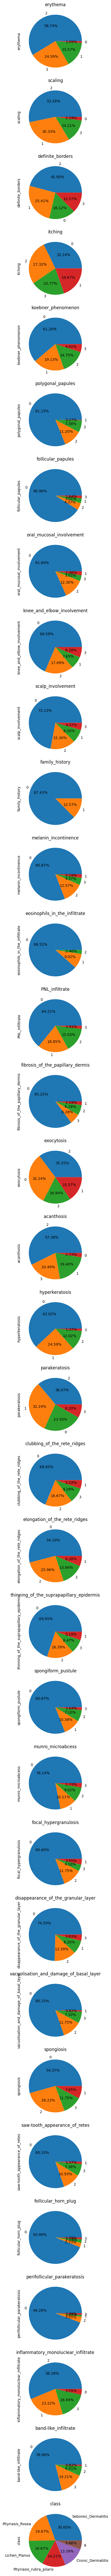

In [34]:
import matplotlib.pyplot as plt

pie_data = data[['erythema', 'scaling', 'definite_borders', 'itching',
              'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
              'oral_mucosal_involvement', 'knee_and_elbow_involvement',
              'scalp_involvement', 'family_history', 'melanin_incontinence',
              'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
              'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
              'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
              'elongation_of_the_rete_ridges',
              'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
              'munro_microabcess', 'focal_hypergranulosis',
              'disappearance_of_the_granular_layer',
              'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
              'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
              'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
              'band-like_infiltrate', 'class']]

plt.figure(figsize=(80, 100))
plotnumber = 1

# Iterate through the columns and create pie charts
for column in pie_data:
    if plotnumber <= 34:
        plt.subplot(34,1, plotnumber)
        pie_data[column].value_counts().plot(kind='pie', autopct='%0.02f%%')
        plt.title(column)  # Add column name as title
        
    plotnumber += 1
    


plt.tight_layout()
plt.show()



#### Insights of all attributes
#### Erythema
- Based on the information presented in the pie plot for the attribute "Erythema," it is evident that a significant majority, specifically 58.74%, of the data points correspond to a value of 2. Additionally, the value of 3 accounts for 24.59%, while the value of 1 comprises 15.57% of the distribution. Notably, the lowest percentage, 1.09%, is attributed to the value 0.
- The pie plot clearly illustrates that more than 55% of the data points in the "Erythema" attribute fall within the value of 2. This suggests a substantial concentration of data around this intermediate value.

#### Scaling
- The pie plot for the "Scaling" attribute reveals that the majority of data points, specifically 53.28%, correspond to a value of 2. In addition, 30.33% of the data falls within the value of 1, while 14.21% is attributed to the value of 3. Notably, the smallest percentage, 2.19%, is assigned to the value 0.
- Conclusively, the pie plot demonstrates that more than 50% of the "Scaling" attribute is concentrated around the value 2, highlighting its prominence within the dataset.

#### definite_borders
- The "definite_borders" attribute exhibits the following distribution in the dataset: 53.28% of the data corresponds to the value 2, 30.33% is attributed to the value 1, 14.21% to the value 3, and the smallest percentage, 2.19%, is assigned to the value 0. Notably, more than 50% of the "definite_borders" attribute is concentrated around the value 2, as indicated by the pie chart.

#### itching
- The distribution of the "itching" attribute within the dataset is as follows: 32.24% of the data points have a value of 0, indicating the absence of itching. Additionally, 27.32% of the data points have a value of 2, 20.77% have a value of 3, and 19.67% have a value of 1, signifying varying degrees of itching.
- The observation that more than 30% of the "itching" attribute is associated with the value 0 suggests that itching is notably absent in this subset, as a value of 0 indicates the absence or lack of this particular feature. This information is crucial for understanding the prevalence of itching within the dataset, with a significant portion of individuals (32.24%) not experiencing this symptom.
#### koebner_phenomenon
- The distribution of the "koebner_phenomenon" attribute in the dataset is as follows: 61.20% of the data points have a value of 0, indicating the absence of the koebner phenomenon. Additionally, 19.13% of the data points have a value of 1, 14.75% have a value of 2, and 4.92% have a value of 3, representing varying degrees of the koebner phenomenon.

- The observation that more than 60% of the "koebner_phenomenon" attribute is associated with the value 0 suggests that the koebner phenomenon is notably absent in this subset, as a value of 0 indicates the absence or lack of this particular feature. This information is essential for understanding the prevalence of the koebner phenomenon within the dataset, with a significant majority (61.20%) of individuals not exhibiting this phenomenon.
#### polygonal_papules
- These sentences are describing the distribution of different values for the attribute "polygonal_papules" in a dataset or context. Here's a brief summary:

1. The attribute "polygonal_papules" has four possible values: 0, 1, 2, and 3.
2. The value 0 is the most common, occurring in 81.15% of cases, indicating that it is the dominant value for this attribute.
3. The value 2 is the second most common, appearing in 11.20% of cases.
4. The value 3 is less common, with a frequency of 7.38%.
5. The value 1 is the least common, representing only 0.27% of cases.
6. A conclusion is drawn from this distribution: Since more than 80% of instances have the value 0, it suggests that "polygonal_papules" is mostly absent or not present (as 0 usually indicates the absence of a feature).

- In summary, these sentences provide information about the prevalence of different values for the attribute "polygonal_papules," with a focus on the high occurrence of value 0, suggesting its absence in the majority of cases.


#### follicular_papules
- value of 0 in follicular_papules  has 90.98% 
- value of 2 in follicular_papules  has 4.37% 
- value of 1 in follicular_papules  has 3.01%
- value of 3 in follicular_papules  has 1.64%
- More than 90% of attribute follicular_papules belongs to value 0 according to Pie Plot
- It means follicular_papules is absent in 90.98% as 0 indicate feature is not present


#### oral_mucosal_involvement
- These sentences provide information about the distribution of values for the attribute "oral_mucosal_involvement" in a dataset or context:

1. The attribute "oral_mucosal_involvement" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, representing 81.69% of the cases, indicating that it is the predominant value for this attribute.
3. The value 2 is the second most common, occurring in 12.30% of cases.
4. The value 3 is less common, with a frequency of 3.55%.
5. The value 1 is the least common, found in only 2.46% of cases.
6. The analysis concludes that "oral_mucosal_involvement" is largely absent in more than 80% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to oral mucosal involvement is not present in the majority of instances.

- In summary, these sentences describe the distribution of values for the attribute "oral_mucosal_involvement" and highlight the significant absence of this feature, as more than 80% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### knee_and_elbow_involvement
- value of 0 in knee_and_elbow_involvement  has 68.58% 
- value of 2 in knee_and_elbow_involvement  has 17.49% 
- value of 1 in knee_and_elbow_involvement  has 7.65%
- value of 3 in knee_and_elbow_involvement  has 6.28%
- More than 60% of attribute knee_and_elbow_involvement belongs to value 0 according to Pie Plot
- It means knee_and_elbow_involvement is absent in 68.58% as 0 indicate feature is not present.


#### scalp_involvement
- These sentences provide information about the distribution of values for the attribute "scalp_involvement" in a dataset or context:

1. The attribute "scalp_involvement" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 72.13% of cases, making it the predominant value for this attribute.
3. The value 2 is the second most common, appearing in 15.30% of cases.
4. The value 1 is less common, with a frequency of 8.20%.
5. The value 3 is the least common, found in only 4.37% of cases.
6. The analysis concludes that "scalp_involvement" is mostly absent in more than 70% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to scalp involvement is not present in the majority of instances, specifically, it is absent in approximately 68.58% of cases.

- In summary, these sentences describe the distribution of values for the attribute "scalp_involvement" and highlight the significant absence of this feature, as more than 70% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### family_history
- These sentences provide information about the distribution of values for the attribute "family_history" in a dataset or context:

1. The attribute "family_history" has two possible values: 0 and 1.
2. The most common value is 0, which is present in 87.43% of cases, making it the predominant value for this attribute.
3. The value 1 is less common, with a frequency of 12.57%.
4. The analysis concludes that more than 85% of cases fall under the value 0 for "family_history." This indicates that the majority of instances, specifically 87.43%, do not have a family history related to the attribute in question.

- In summary, these sentences describe the distribution of values for the attribute "family_history" and highlight that the majority of cases, at 87.43%, do not have a family history related to this attribute, as indicated by the high prevalence of value 0.


#### melanin_incontinence
- These sentences provide information about the distribution of values for the attribute "melanin_incontinence" in a dataset or context:

1. The attribute "melanin_incontinence" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 80.87% of cases, making it the predominant value for this attribute.
3. The value 2 is the second most common, appearing in 12.57% of cases.
4. The value 3 is less common, with a frequency of 4.37%.
5. The value 1 is the least common, found in only 2.19% of cases.
6. The analysis concludes that "melanin_incontinence" is largely absent in more than 80% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to melanin incontinence is not present in the majority of instances.

- In summary, these sentences describe the distribution of values for the attribute "melanin_incontinence" and highlight the significant absence of this feature, as more than 80% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### eosinophils_in_the_infiltrate 
- These sentences provide information about the distribution of values for the attribute "eosinophils_in_the_infiltrate" in a dataset or context:

1. The attribute "eosinophils_in_the_infiltrate" has three possible values: 0, 1, and 2.
2. The most common value is 0, which is present in 88.52% of cases, making it the predominant value for this attribute.
3. The value 1 is the second most common, appearing in 9.02% of cases.
4. The value 2 is less common, with a frequency of 2.46%.
5. The value 3 is not present in the dataset.
6. The analysis concludes that "eosinophils_in_the_infiltrate" is mostly absent in more than 50% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to eosinophils in the infiltrate is not present in the majority of instances, specifically, it is absent in 88.52% of cases.

- In summary, these sentences describe the distribution of values for the attribute "eosinophils_in_the_infiltrate" and highlight the significant absence of this feature, as more than 50% of cases are associated with the value 0, indicating the feature's nonexistence in those cases. Additionally, it's worth noting that value 3 is not present in the dataset.


#### PNL_infiltrate
- These sentences provide information about the distribution of values for the attribute "PNL_infiltrate" in a dataset or context:

1. The attribute "PNL_infiltrate" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 64.21% of cases, making it the predominant value for this attribute.
3. The value 1 is the second most common, appearing in 18.85% of cases.
4. The value 2 is also fairly common, with a frequency of 15.03%.
5. The value 3 is the least common, found in only 1.91% of cases.
6. The analysis concludes that "PNL_infiltrate" is mostly absent in more than 70% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to PNL infiltrate is not present in the majority of instances, specifically, it is absent in 64.21% of cases.

- In summary, these sentences describe the distribution of values for the attribute "PNL_infiltrate" and highlight the significant absence of this feature, as more than 70% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### fibrosis_of_the_papillary_dermis
- These sentences provide information about the distribution of values for the attribute "fibrosis_of_the_papillary_dermis" in a dataset or context:

1. The attribute "fibrosis_of_the_papillary_dermis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 85.25% of cases, making it the predominant value for this attribute.
3. Both values 2 and 3 are equally the second most common, each appearing in 6.28% of cases.
4. The value 1 is the least common, found in only 2.19% of cases.
5. The analysis concludes that "fibrosis_of_the_papillary_dermis" is mostly absent in more than 85% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to fibrosis in the papillary dermis is not present in the majority of instances, specifically, it is absent in 85.25% of cases.

- In summary, these sentences describe the distribution of values for the attribute "fibrosis_of_the_papillary_dermis" and highlight the significant absence of this feature, as more than 85% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### exocytosis
- These sentences provide information about the distribution of values for the attribute "exocytosis" in a dataset or context:

1. The attribute "exocytosis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 2, which is present in 35.25% of cases, making it the predominant value for this attribute.
3. The value 0 is the second most common, appearing in 32.24% of cases.
4. The value 3 is also fairly common, with a frequency of 16.94%.
5. The value 1 is the least common, found in 15.57% of cases.
6. The analysis notes that more than 35% of cases belong to value 2 for "exocytosis," indicating that it is the dominant value in the distribution.

- In summary, these sentences describe the distribution of values for the attribute "exocytosis" and highlight that the most prevalent value is 2, which is present in more than 35% of cases. This information provides insights into the prevalence of different levels of exocytosis in the dataset or context.


#### acanthosis

- These sentences provide information about the distribution of values for the attribute "acanthosis" in a dataset or context:

1. The attribute "acanthosis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 2, which is present in 57.38% of cases, making it the predominant value for this attribute.
3. The value 3 is the second most common, appearing in 20.49% of cases.
4. The value 1 is also fairly common, with a frequency of 19.40%.
5. The value 0 is the least common, found in only 2.73% of cases.
6. The analysis notes that more than 2% of cases belong to value 2 for "acanthosis," indicating that it is the dominant value in the distribution.

- In summary, these sentences describe the distribution of values for the attribute "acanthosis" and highlight that the most prevalent value is 2, which is present in more than 57% of cases. Additionally, it's noted that a very small percentage (2.73%) belongs to value 0, suggesting that "acanthosis" is mostly absent in this dataset, as indicated by the low prevalence of value 0. This information provides insights into the prevalence of different levels of acanthosis in the dataset or context.



#### hyperkeratosis
1. "Hyperkeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "hyperkeratosis" is 0, which is present in 62.02% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 24.59% of cases.
4. Value 2 is also relatively common, with a frequency of 12.02%.
5. Value 3 is the least common, appearing in only 1.37% of cases.
6. The statement, "More than 62% of attribute hyperkeratosis belongs to value 0 according to the Pie Plot," emphasizes that the majority of instances in the dataset have value 0 for hyperkeratosis.

- The concluding statement, "It means hyperkeratosis is absent in 62.02% as 0 indicates the feature is not present," explains that in approximately 62.02% of the cases, hyperkeratosis is absent. In other words, the feature related to hyperkeratosis is not present or not significant in these cases. The high prevalence of value 0 suggests a lack of hyperkeratosis in the majority of instances, making it a notable observation in the dataset.


#### parakeratosis


1. "Parakeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "parakeratosis" is 2, which is present in 36.07% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 32.24% of cases.
4. Value 0 is also fairly common, with a frequency of 23.50%.
5. Value 3 is the least common, appearing in only 8.20% of cases.
6. The statement, "More than 36% of attribute parakeratosis belongs to value 0 according to the Pie Plot," emphasizes that a significant proportion of instances in the dataset have value 0 for parakeratosis.

- The concluding statement, "It means parakeratosis is absent in 23.50% as 0 indicates the feature is not present," explains that in approximately 23.50% of the cases, parakeratosis is absent. In other words, the feature related to parakeratosis is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of parakeratosis in the dataset..


#### clubbing_of_the_rete_ridges
- it's provides the information about the distribution of values for the attribute "clubbing_of_the_rete_ridges" and explain the implications of this distribution:

1. "Clubbing_of_the_rete_ridges" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "clubbing_of_the_rete_ridges" is 0, which is present in 68.85% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 16.67% of cases.
4. Value 3 is also relatively common, with a frequency of 9.29%.
5. Value 1 is the least common, appearing in only 5.19% of cases.
6. The statement, "More than 68% of attribute clubbing_of_the_rete_ridges belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for clubbing_of the rete ridges.

- The concluding statement, "It means clubbing_of_the_rete_ridges is absent in 68.85% as 0 indicates the feature is not present," explains that in approximately 68.85% of the cases, clubbing of the rete ridges is absent. In other words, the feature related to clubbing of the rete ridges is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of clubbing of the rete ridges in the dataset.


#### elongation_of_the_rete_ridges


1. "Elongation_of_the_rete_ridges" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "elongation_of_the_rete_ridges" is 0, which is present in 54.10% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 25.96% of cases.
4. Value 3 is also relatively common, with a frequency of 13.66%.
5. Value 1 is the least common, appearing in only 6.28% of cases.
6. The statement, "More than 54% of attribute elongation_of_the_rete_ridges belongs to value 0 according to the Pie Plot," emphasizes that a significant proportion of instances in the dataset have value 0 for elongation of the rete ridges.

- The concluding statement, "It means elongation_of_the_rete_ridges is absent in 54.10% as 0 indicates the feature is not present," explains that in approximately 54.10% of the cases, elongation of the rete ridges is absent. In other words, the feature related to elongation of the rete ridges is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of elongation of the rete ridges in the dataset.


#### thinning_of_the_suprapapillary_epidermis


1. "Thinning_of_the_suprapapillary_epidermis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "thinning_of_the_suprapapillary_epidermis" is 0, which is present in 69.95% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 16.39% of cases.
4. Value 3 is also relatively common, with a frequency of 8.47%.
5. Value 1 is the least common, appearing in only 5.19% of cases.
6. The statement, "More than 69% of attribute thinning_of_the_suprapapillary_epidermis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for thinning of the suprapapillary epidermis.

- The concluding statement, "It means thinning_of_the_suprapapillary_epidermis is absent in 69.95% as 0 indicates the feature is not present," explains that in approximately 69.95% of the cases, thinning of the suprapapillary epidermis is absent. In other words, the feature related to thinning of the suprapapillary epidermis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of thinning of the suprapapillary epidermis in the dataset.

#### spongiform_pustule


1. "Spongiform_pustule" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "spongiform_pustule" is 0, which is present in 80.87% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 10.38% of cases.
4. Value 2 is also relatively common, with a frequency of 7.10%.
5. Value 3 is the least common, appearing in only 1.64% of cases.
6. The statement, "More than 80% of attribute spongiform_pustule belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for spongiform pustules.

- The concluding statement, "It means spongiform_pustule is absent in 80.87% as 0 indicates the feature is not present," explains that in approximately 80.87% of the cases, spongiform pustules are absent. In other words, the feature related to spongiform pustules is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of spongiform pustules in the dataset.

#### munro_microabcess


1. "Munro_microabcess" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "munro_microabcess" is 0, which is present in 78.14% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 10.11% of cases.
4. Value 2 is also relatively common, with a frequency of 9.02%.
5. Value 3 is the least common, appearing in only 2.73% of cases.
6. The statement, "More than 78% of attribute munro_microabcess belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for munro microabscess.

- The concluding statement, "It means munro_microabcess is absent in 78.14% as 0 indicates the feature is not present," explains that in approximately 78.14% of the cases, munro microabscess is absent. In other words, the feature related to munro microabscess is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of munro microabscess in the dataset.

#### focal_hypergranulosis


1. "Focal_hypergranulosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "focal_hypergranulosis" is 0, which is present in 80.60% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 11.75% of cases.
4. Value 3 is also relatively common, with a frequency of 4.10%.
5. Value 1 is the least common, appearing in only 3.55% of cases.
6. The statement, "More than 80% of attribute focal_hypergranulosis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for focal hypergranulosis.

- The concluding statement, "It means focal_hypergranulosis is absent in 80.60% as 0 indicates the feature is not present," explains that in approximately 80.60% of the cases, focal hypergranulosis is absent. In other words, the feature related to focal hypergranulosis is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of focal hypergranulosis in the dataset.
#### disappearance_of_the_granular_layer


1. "Disappearance_of_the_granular_layer" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "disappearance_of_the_granular_layer" is 0, which is present in 74.59% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 13.39% of cases.
4. Value 3 is also relatively common, with a frequency of 3.83%.
5. Value 1 is the least common, appearing in only 8.20% of cases.
6. The statement, "More than 74% of attribute disappearance_of_the_granular_layer belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for the disappearance of the granular layer.

- The concluding statement, "It means disappearance_of_the_granular_layer is absent in 74.59% as 0 indicates the feature is not present," explains that in approximately 74.59% of the cases, the disappearance of the granular layer is absent. In other words, the feature related to the disappearance of the granular layer is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of this feature in the dataset.


#### vacuolisation_and_damage_of_basal_layer 

1. "Vacuolisation_and_damage_of_basal_layer" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "vacuolisation_and_damage_of_basal_layer" is 0, which is present in 80.33% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 11.75% of cases.
4. Value 3 is also relatively common, with a frequency of 7.10%.
5. Value 1 is the least common, appearing in only 0.82% of cases.
6. The statement, "More than 80% of attribute vacuolisation_and_damage_of_basal_layer belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for vacuolisation and damage of the basal layer.

- The concluding statement, "It means vacuolisation_and_damage_of_basal_layer is absent in 80.33% as 0 indicates the feature is not present," explains that in approximately 80.33% of the cases, vacuolisation and damage of the basal layer are absent. In other words, the feature related to vacuolisation and damage of the basal layer is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### spongiosis


1. "Spongiosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "spongiosis" is 0, which is present in 54.37% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 26.23% of cases.
4. Value 3 is also relatively common, with a frequency of 11.75%.
5. Value 1 is the least common, appearing in only 7.65% of cases.
6. The statement, "More than 54% of attribute spongiosis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for spongiosis.

- The concluding statement, "It means spongiosis is absent in 54.37% as 0 indicates the feature is not present," explains that in approximately 54.37% of the cases, spongiosis is absent. In other words, the feature related to spongiosis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of spongiosis in the dataset.


#### saw-tooth_appearance_of_retes


1. "Saw-tooth_appearance_of_retes" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "saw-tooth_appearance_of_retes" is 0, which is present in 80.33% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 10.93% of cases.
4. Value 3 is also relatively common, with a frequency of 7.38%.
5. Value 1 is the least common, appearing in only 1.37% of cases.
6. The statement, "More than 80% of attribute saw-tooth_appearance_of_retes belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for the saw-tooth appearance of retes.

- The concluding statement, "It means saw-tooth_appearance_of_retes is absent in 80.33% as 0 indicates the feature is not present," explains that in approximately 80.33% of the cases, the saw-tooth appearance of retes is absent. In other words, the feature related to the saw-tooth appearance of retes is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### follicular_horn_plug


1. "Follicular_horn_plug" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "follicular_horn_plug" is 0, which is present in a substantial majority of cases, at 93.99%.
3. Value 1 is the second most common, found in 2.73% of cases.
4. Value 2 is also present in 2.19% of cases.
5. Value 3 is the least common, appearing in only 1.09% of cases.
6. The statement, "More than 93% of attribute follicular_horn_plug belongs to value 0 according to the Pie Plot," emphasizes that an overwhelming majority of instances in the dataset have value 0 for follicular horn plugs.

- The concluding statement, "It means follicular_horn_plug is absent in 93.99% as 0 indicates the feature is not present," explains that in approximately 93.99% of the cases, follicular horn plugs are absent. In other words, the feature related to follicular horn plugs is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### perifollicular_parakeratosis


1. "Perifollicular_parakeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "perifollicular_parakeratosis" is 0, which is present in the vast majority of cases, at 94.26%.
3. Value 2 is the second most common, found in 3.54% of cases.
4. Value 3 is present in 1.91% of cases.
5. Value 1 is the least common, appearing in only 1.09% of cases.
6. The statement, "More than 94% of attribute perifollicular_parakeratosis belongs to value 0 according to the Pie Plot," emphasizes that an overwhelming majority of instances in the dataset have value 0 for perifollicular parakeratosis.

- The concluding statement, "It means perifollicular_parakeratosis is absent in 94.26% as 0 indicates the feature is not present," explains that in approximately 94.26% of the cases, perifollicular parakeratosis is absent. In other words, the feature related to perifollicular parakeratosis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### inflammatory_monoluclear_inflitrate


1. "Inflammatory_mononuclear_infiltrate" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "inflammatory_mononuclear_infiltrate" is 2, which is present in a significant majority of cases, at 56.28%.
3. Value 3 is the second most common, found in 16.94% of cases.
4. Value 1 is also relatively common, with a frequency of 23.22%.
5. Value 0 is the least common, appearing in only 3.55% of cases.
6. The statement, "More than 3% of attribute inflammatory_mononuclear_infiltrate belongs to value 0 according to the Pie Plot," emphasizes that a small proportion of instances in the dataset have value 0 for an inflammatory mononuclear infiltrate.

- The concluding statement, "It means inflammatory_mononuclear_infiltrate is absent in 3.55% as 0 indicates the feature is not present," explains that in approximately 3.55% of the cases, an inflammatory mononuclear infiltrate is absent. In other words, the feature related to an inflammatory mononuclear infiltrate is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of this feature in the dataset.
#### band-like_infiltrate


1. "Band-like_infiltrate" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "band-like_infiltrate" is 0, which is present in the majority of cases, at 78.96%.
3. Value 3 is the second most common, found in 14.21% of cases.
4. Value 1 is also relatively common, with a frequency of 8.82%.
5. Value 2 is the least common, appearing in 6.01% of cases.
6. The statement, "More than 78% of attribute band-like_infiltrate belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for a band-like infiltrate.

- The concluding statement, "It means band-like_infiltrate is absent in 78.96% as 0 indicates the feature is not present," explains that in approximately 78.96% of the cases, a band-like infiltrate is absent. In other words, the feature related to a band-like infiltrate is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of this feature in the dataset.

#### class


1. The "class" attribute represents different skin conditions or diseases.
2. The dataset contains instances classified into several categories or classes, including "Psoriasis," "Lichen_Planus," "Seborrheic_Dermatitis," "Chronic_Dermatitis," "Pityriasis_Rosea," and "Pityriasis_rubra_pilaris."
3. The percentages associated with each class represent the distribution of instances in the dataset for each skin condition or disease.
4. "Psoriasis" is the most common class, making up 30.60% of the dataset.
5. "Lichen_Planus" is the second most common, accounting for 19.67% of the cases.
6. "Seborrheic_Dermatitis" follows with 16.67%.
7. "Chronic_Dermatitis" is present in 14.21% of instances.
8. "Pityriasis_Rosea" represents 13.39% of the dataset.
9. "Pityriasis_rubra_pilaris" is the least common, found in 5.46% of cases.

- These percentages indicate the prevalence of each skin condition or disease in the dataset, which is essential for understanding the distribution and composition of the data used in the classification task.




In [35]:
clinical_features=data[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history','Age']]

In [36]:
clinical_features.shape

(366, 12)

In [37]:
Histopathological_Attributes=data[['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'class']]

In [38]:
Histopathological_Attributes.shape

(366, 23)

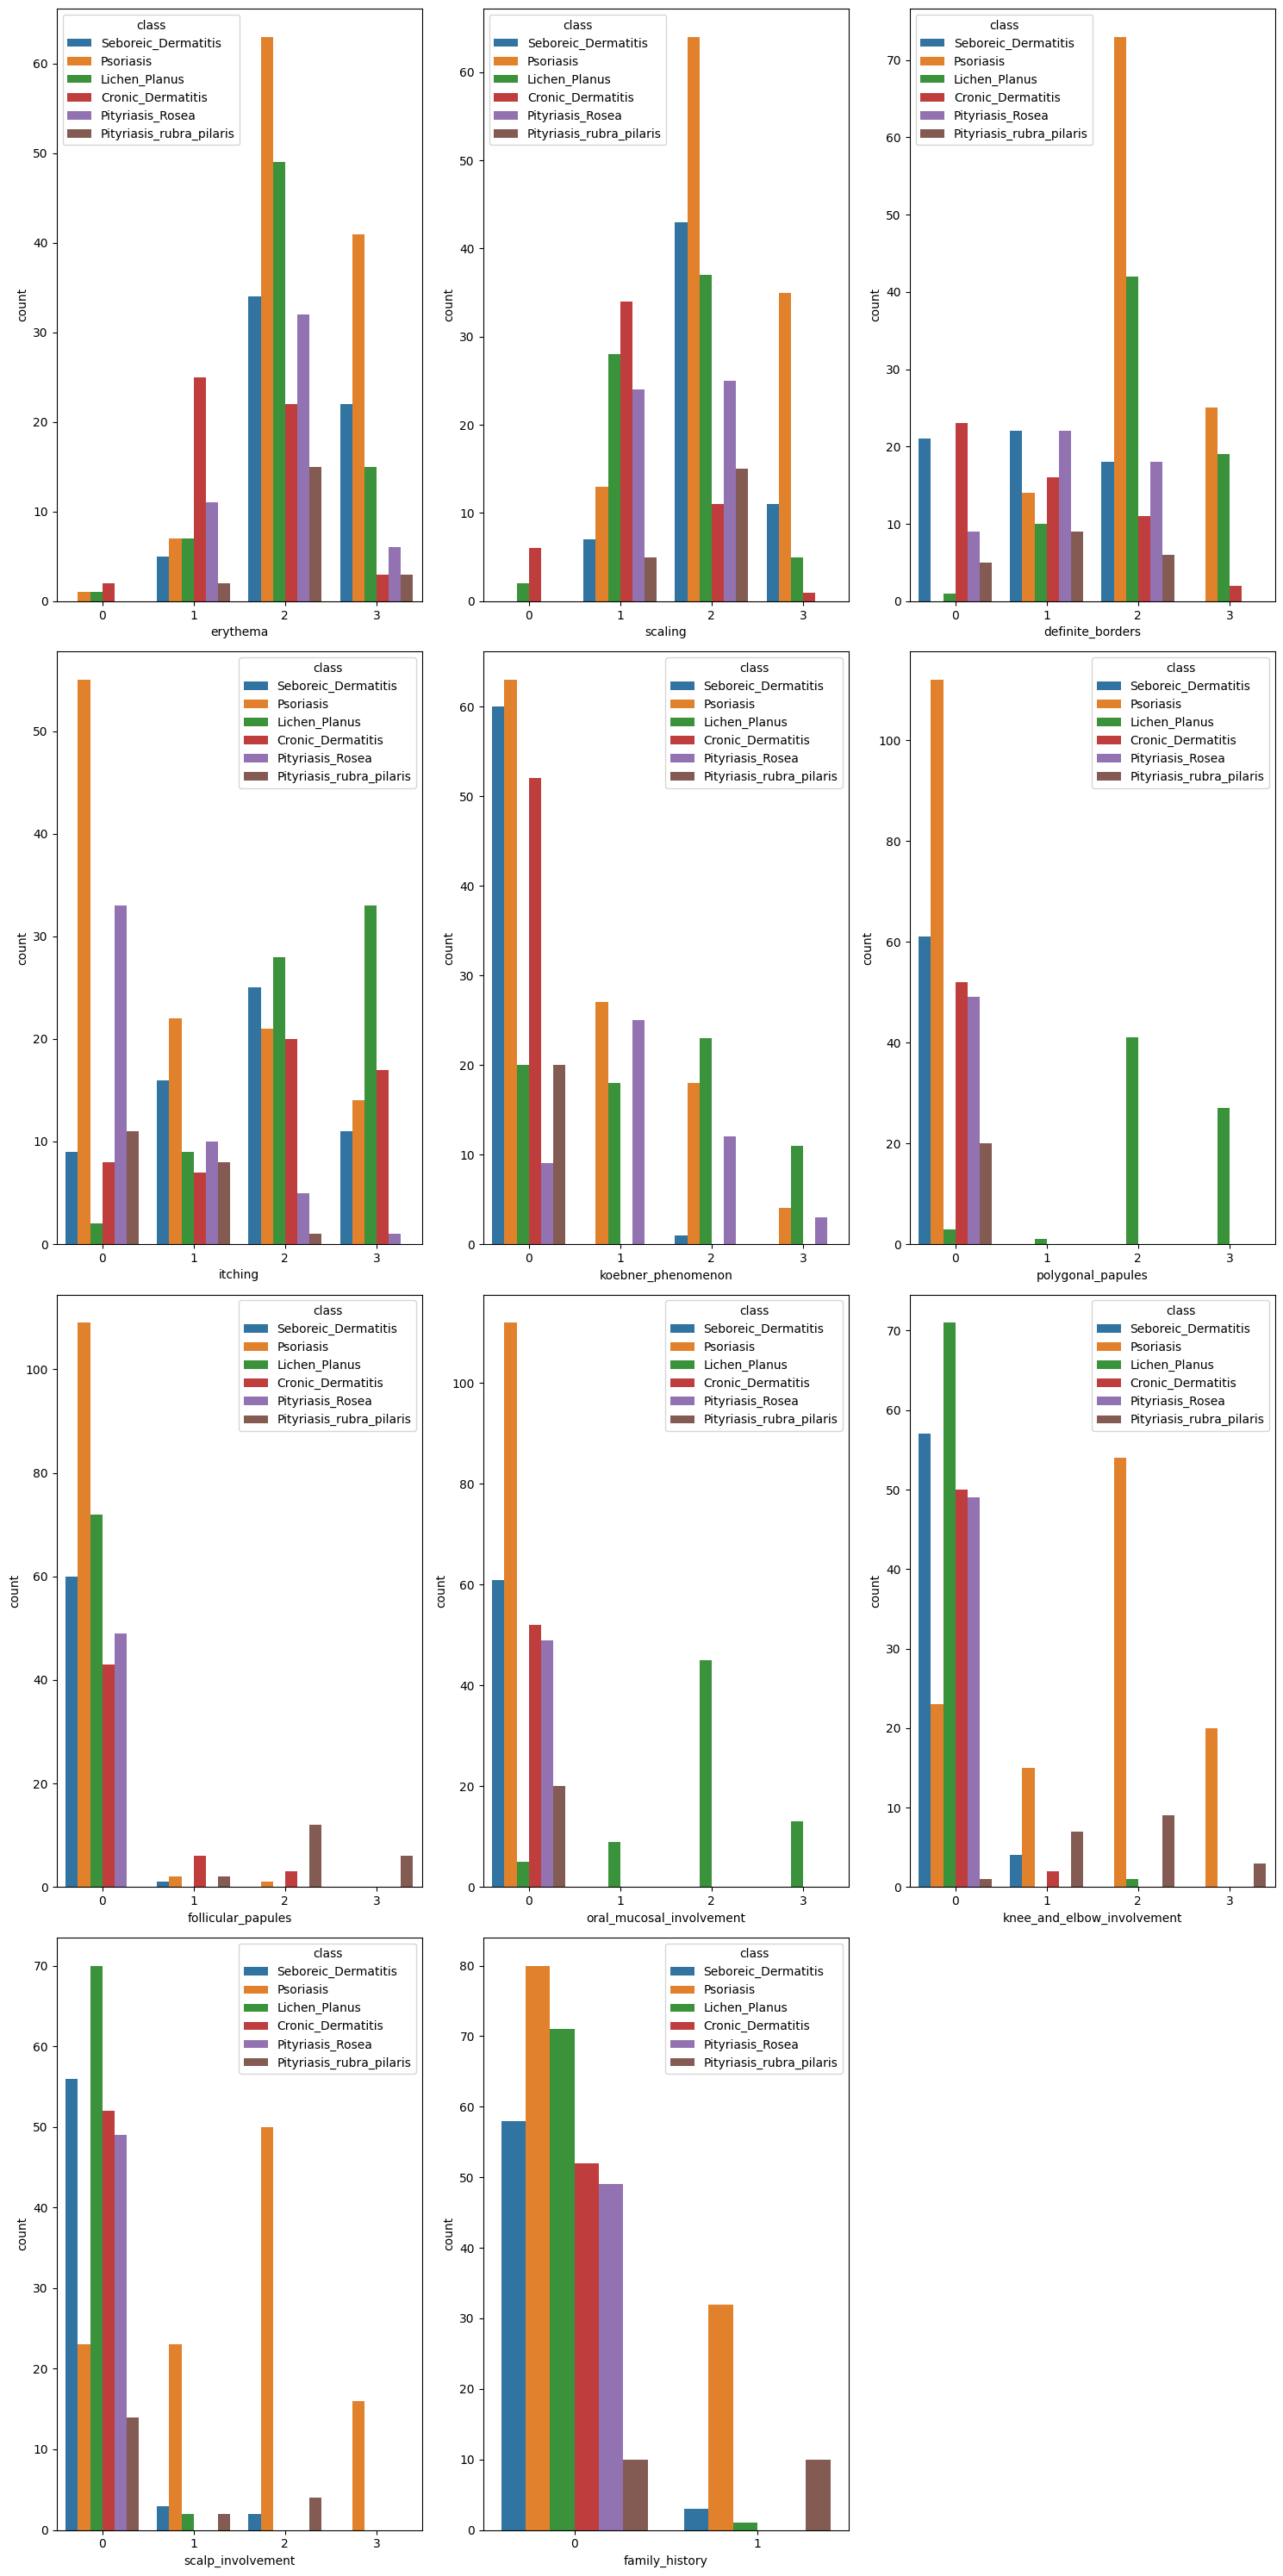

In [39]:
plt.figure(figsize=(15,30))
plotnumber=1
for column in clinical_features.drop('Age',axis=1):
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.countplot(x=clinical_features[column],hue=data['class'])
    plotnumber+=1
plt.tight_layout()

#### Insights
- In this each attribute contains 0-3 values except family history.
- family history contains only 0 & 1.
- family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.
- By using each attribute to find which class of disease distributed in the range of 0 to 3
- 0 means no disease content.
- 3 means high amount of disease content is there.
- 1 & 2 intermediate amount of disease content is there.

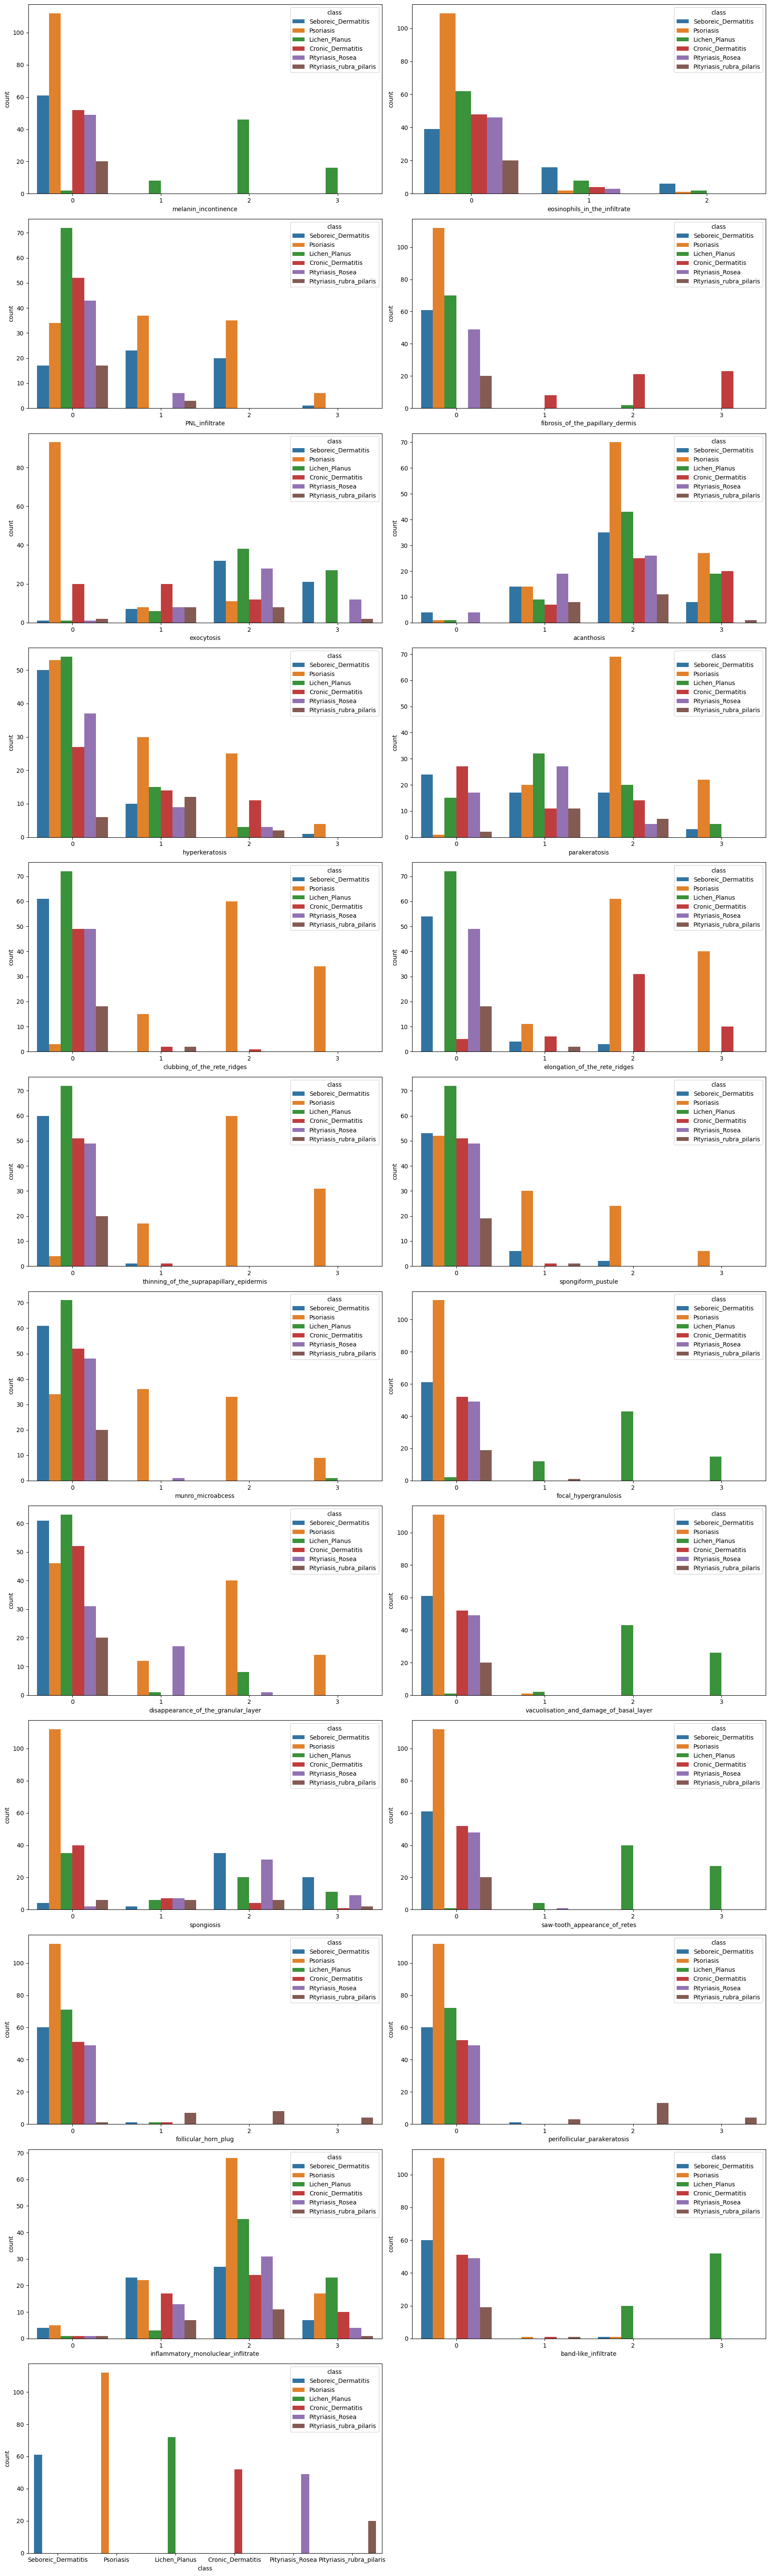

In [40]:
plt.figure(figsize=(18,60))
plotnumber=1
for column in Histopathological_Attributes:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.countplot(x=Histopathological_Attributes[column],hue=data['class'])
    plotnumber+=1
plt.tight_layout()

#### Insights
- In this each attribute contains 0-3 values,except class attribute and eosinophils_in_the_infiltrate.
- eosinophils_in_the_infiltrate attribute contains 0,1 & 2.
- By using each attribute to find which class of disease distributed in the range of 0 to 3
- People who belongs to value 0 (i.e feature not present) has maximium chances to belong to all the classes.
- Class 1 has maximium value in most of attributes whether it is belong to value (0,1,2,3).
- In hyperkeratosis and parakeratosis has maximium probability of belonging to maximium classes in all values.
- In thinning_of_the_suprapapillary_epidermis and spongiform_pustule 3 value has only class 1.
- In follicular_horn_plug and perifollicular_parakeratosis has similar kind of graph.
- class attribute contains Psoriasis,Lichen_Planus,Seboreic_Dermatitis,Cronic_Dermatitis,Pityriasis_Rosea,Pityriasis_rubra_pilaris.
- By using this count plot we know that Psoriasis disease is more and least is Pityriasis_rubra_pilaris disease.




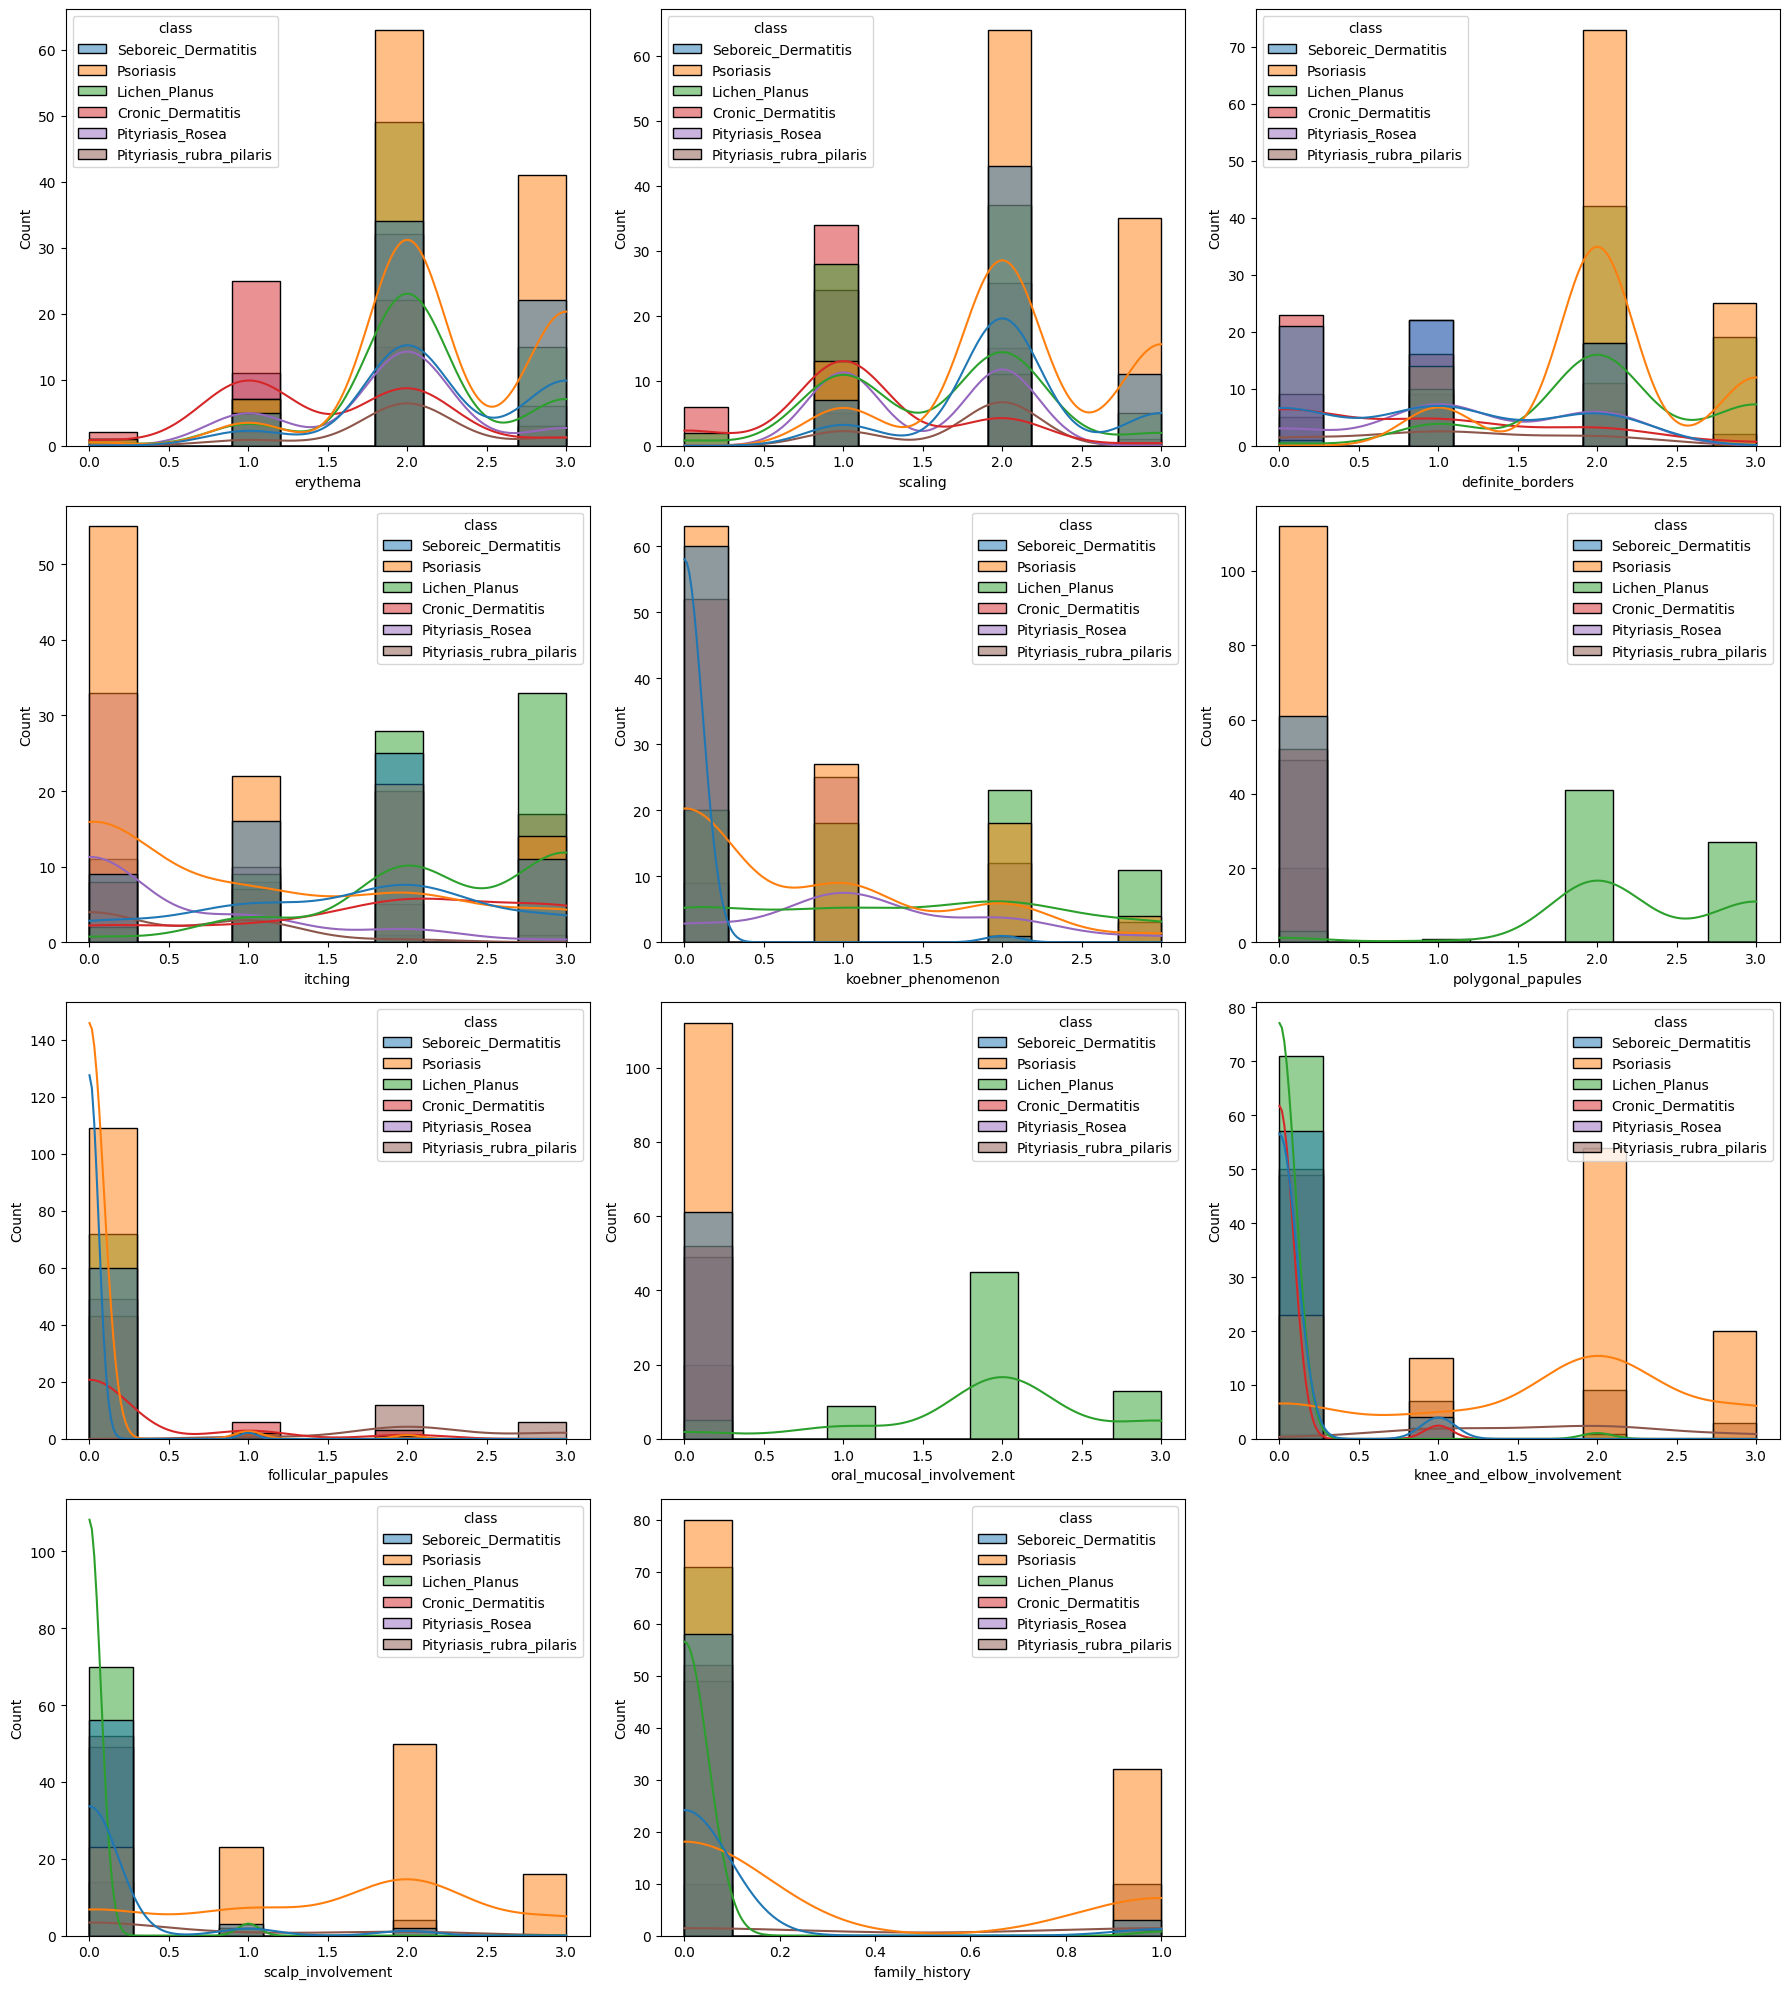

In [41]:
plt.figure(figsize=(18,20))
plotnumber=1
for column in clinical_features.drop('Age',axis=1):
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column],hue=data['class'],kde=True)
    plotnumber+=1
plt.tight_layout()

#### Insights
- This plots shows how data is distributed using this plot.
- All attributes contains more Psoriasis disease content except scalp_involvement and knee_and_elbow_involvement.



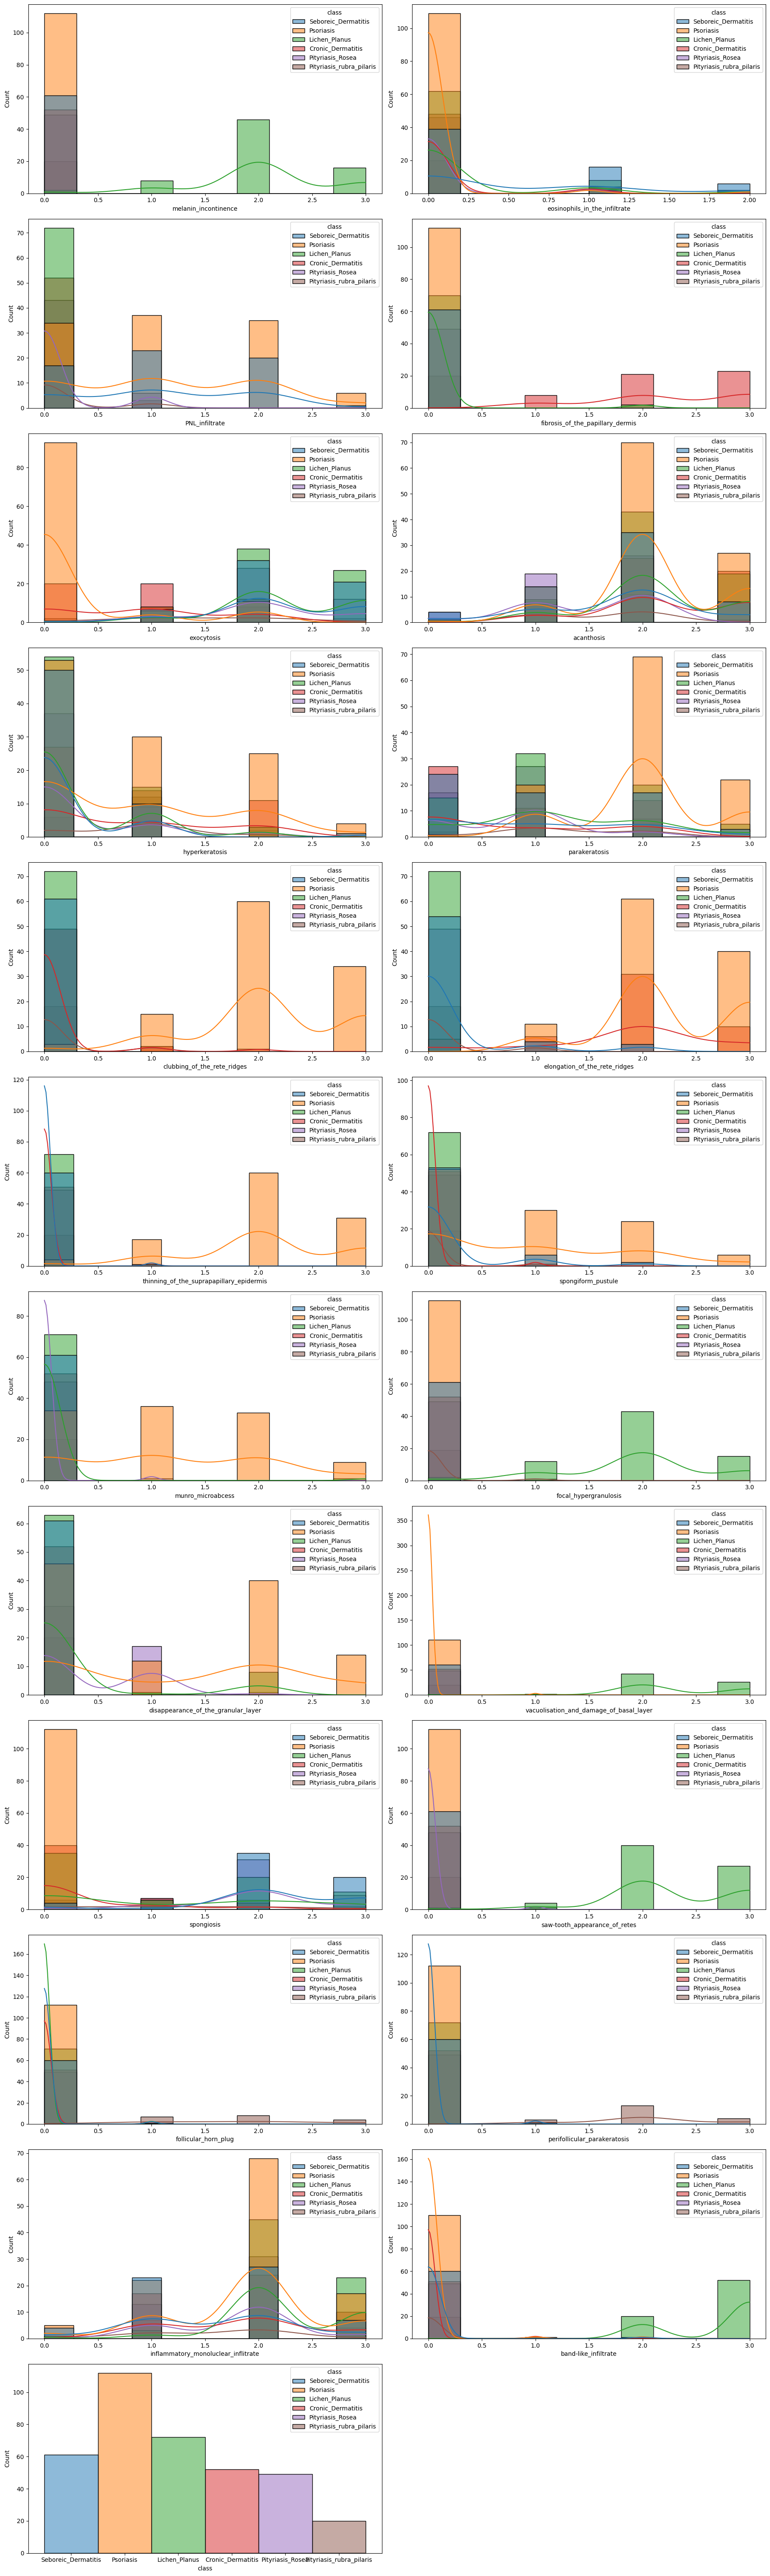

In [42]:
plt.figure(figsize=(18,60))
plotnumber=1
for column in Histopathological_Attributes:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.histplot(x=Histopathological_Attributes[column],hue=data['class'],kde=True)
    plotnumber+=1
plt.tight_layout()

#### Insights
- This plots shows how data is distributed using this plot.
- All attributes having skewed distribution.


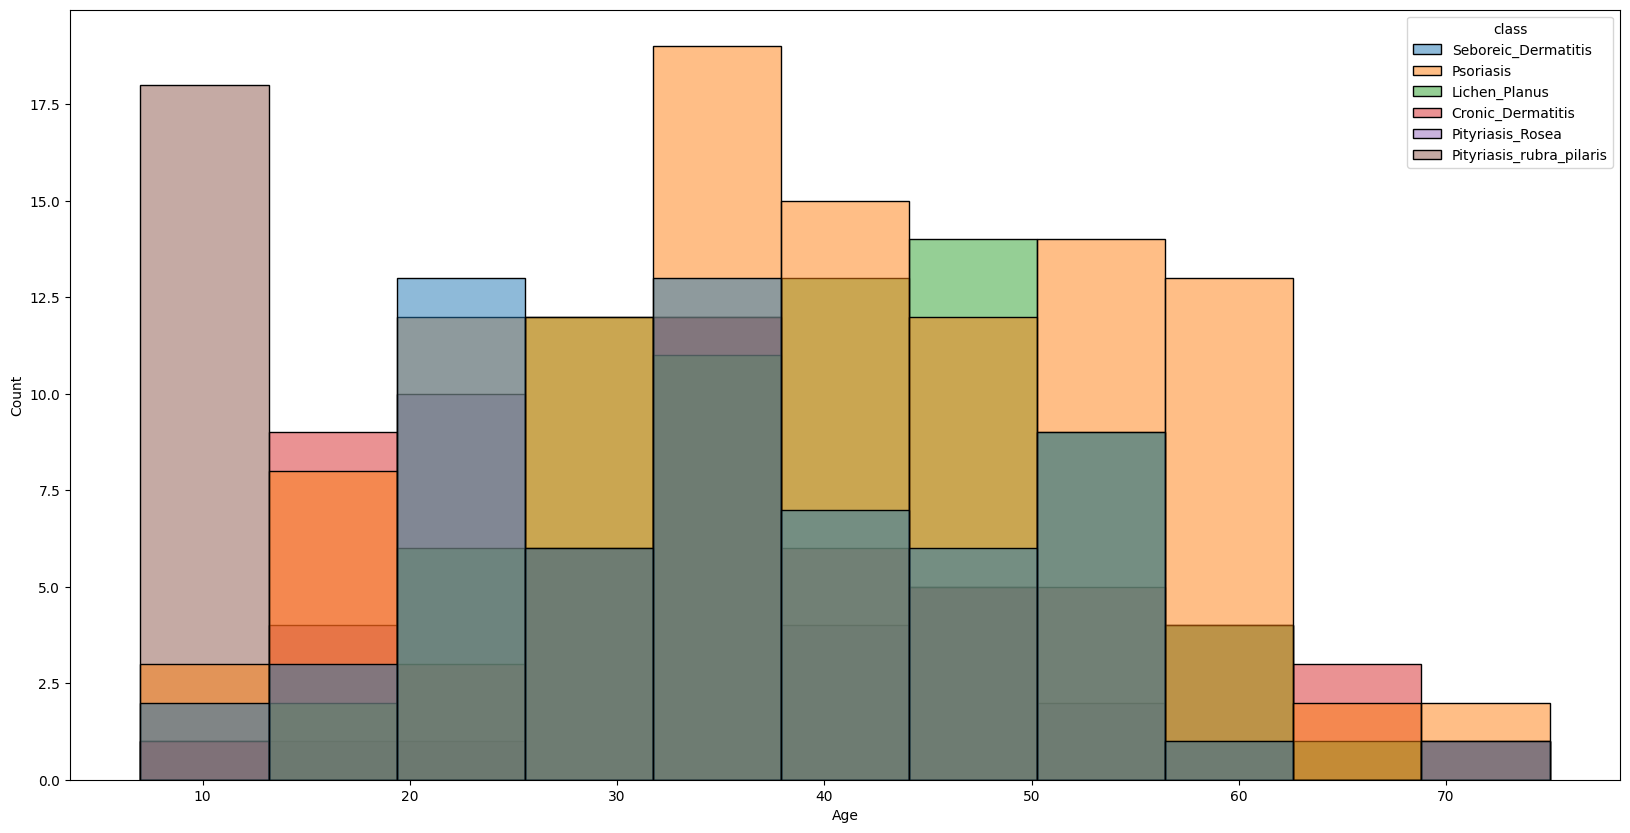

In [43]:
plt.figure(figsize=(20,10))
sns.histplot(data=data,x='Age',hue='class')
plt.show()

#### Insights

- This plot shows the Age is distributed minimum below 10 and maximum above 70 age.
- At the age 32 to 38 having more Psoriasis disease content,and less then 10 age childrens contains more Pityriasis_rubra_pilaris disease.
- The age attribute also not normally distributed.

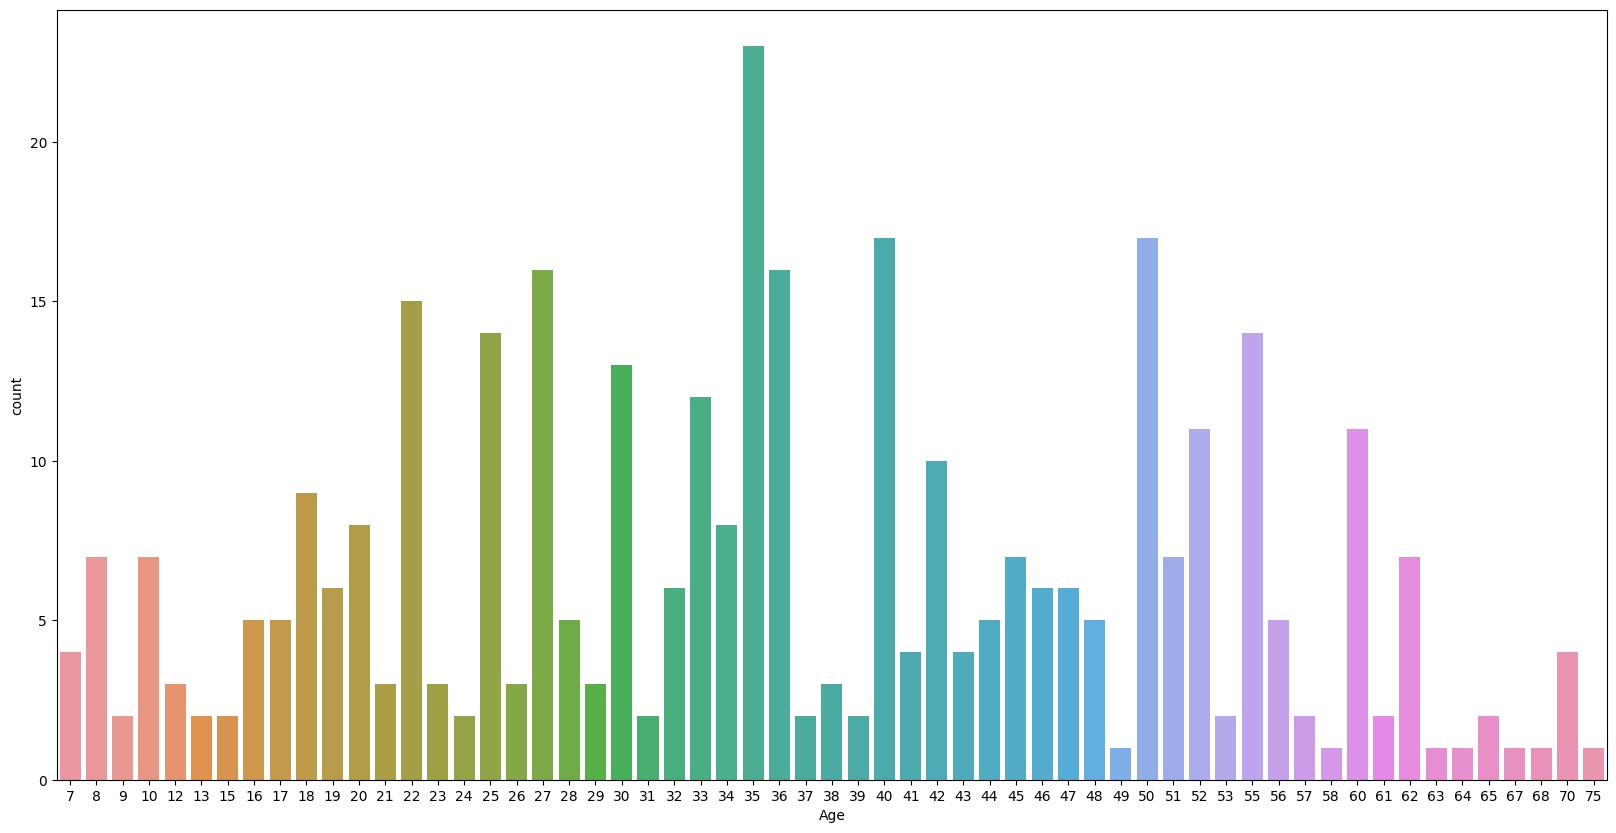

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Age')
plt.show()

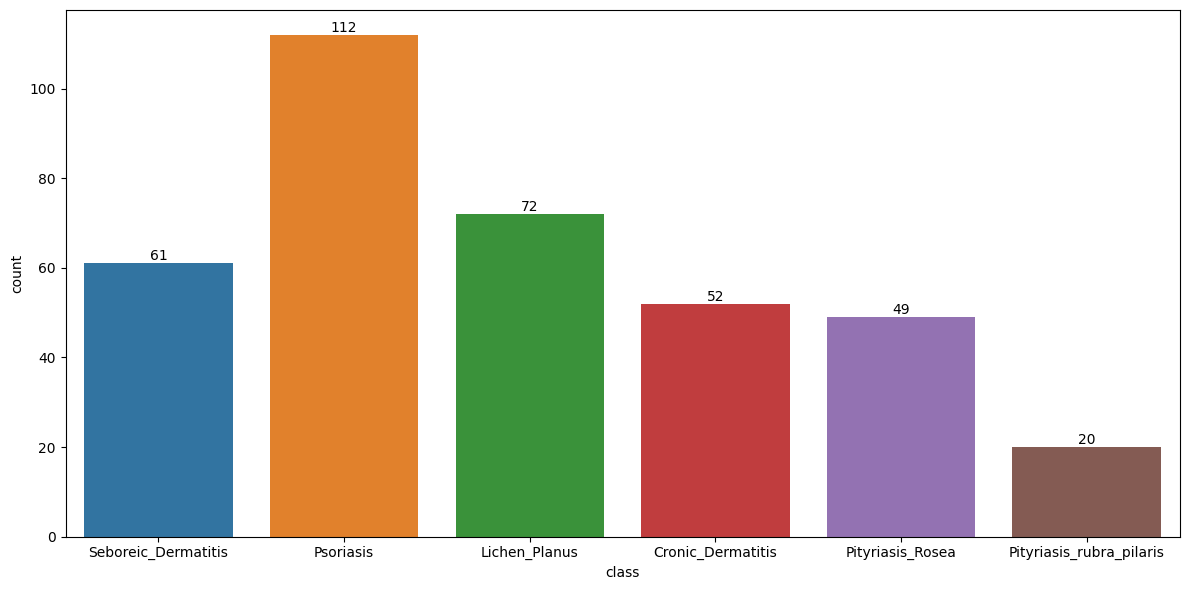

In [45]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['class'])
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

#### Insights
- The bar plot is useful for visualizing the frequency or count of different categories in a categorical variable, such as the 'class' column in our DataFrame. By plotting a count plot, we can compare the number of instances for each class and gain insights into the class distribution. This visualization can reveal class imbalances, identify dominant or minority classes, or provide an overview of the distribution of the target variable.

#### Age wise Distribution of classes of Skin diseases.

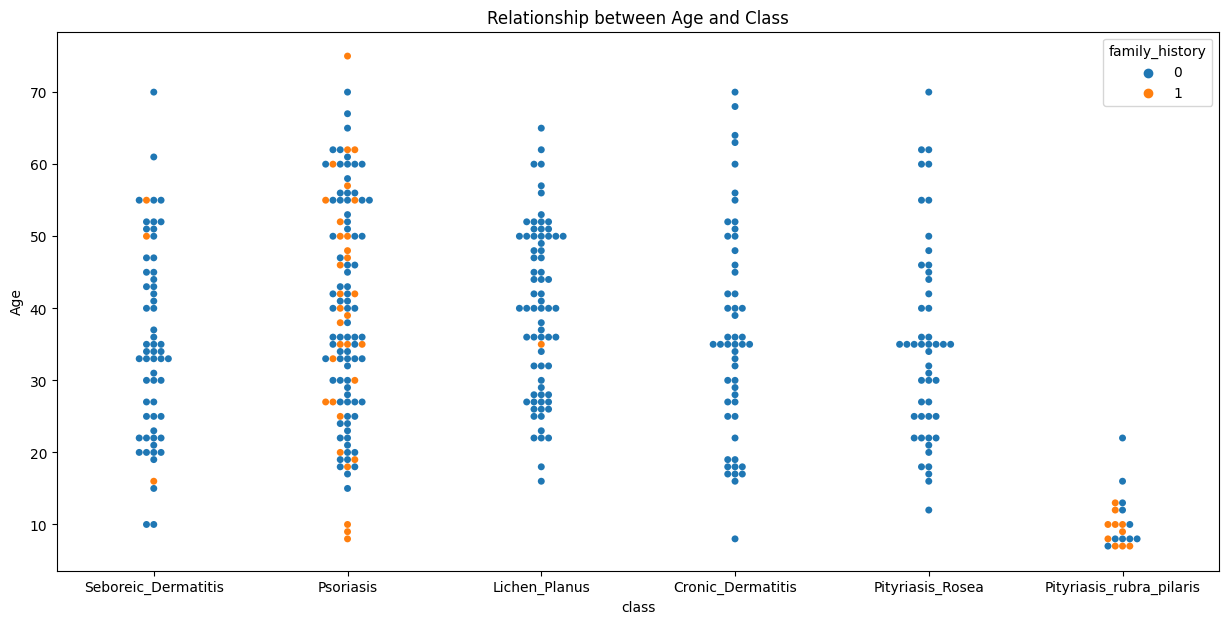

In [46]:
plt.figure(figsize=(15,7))
sns.swarmplot(y="Age", x="class", data=data, hue='family_history')
plt.title('Relationship between Age and Class')
plt.show()

#### Insights
- Pityriasis_Rubra_Pilaris is only found ages below 20. This disease show high relation with family_history. It was observed in family_history of almost half of the patients.
- Except Pityriasis_Rubra_Pilaris, remaining class of diseases are found in almost all the ages.
- Psoriasis is also significantly related to the family history.

In [48]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [73]:
import plotly.express as px

In [74]:
px.bar(data['Age'])

### Data Preprocessing

In [41]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [42]:
data.duplicated().sum()

0

##### This Data is related to the skin disorder so in this we are not considering the outliers. 

In [43]:
data.corr()

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.055432  0.013149   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
Age                                      -0.014001  0.010195   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.043894 -0.008460   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_microabcess                                 0.242232 -0.056056   
f

### Feature Engineering

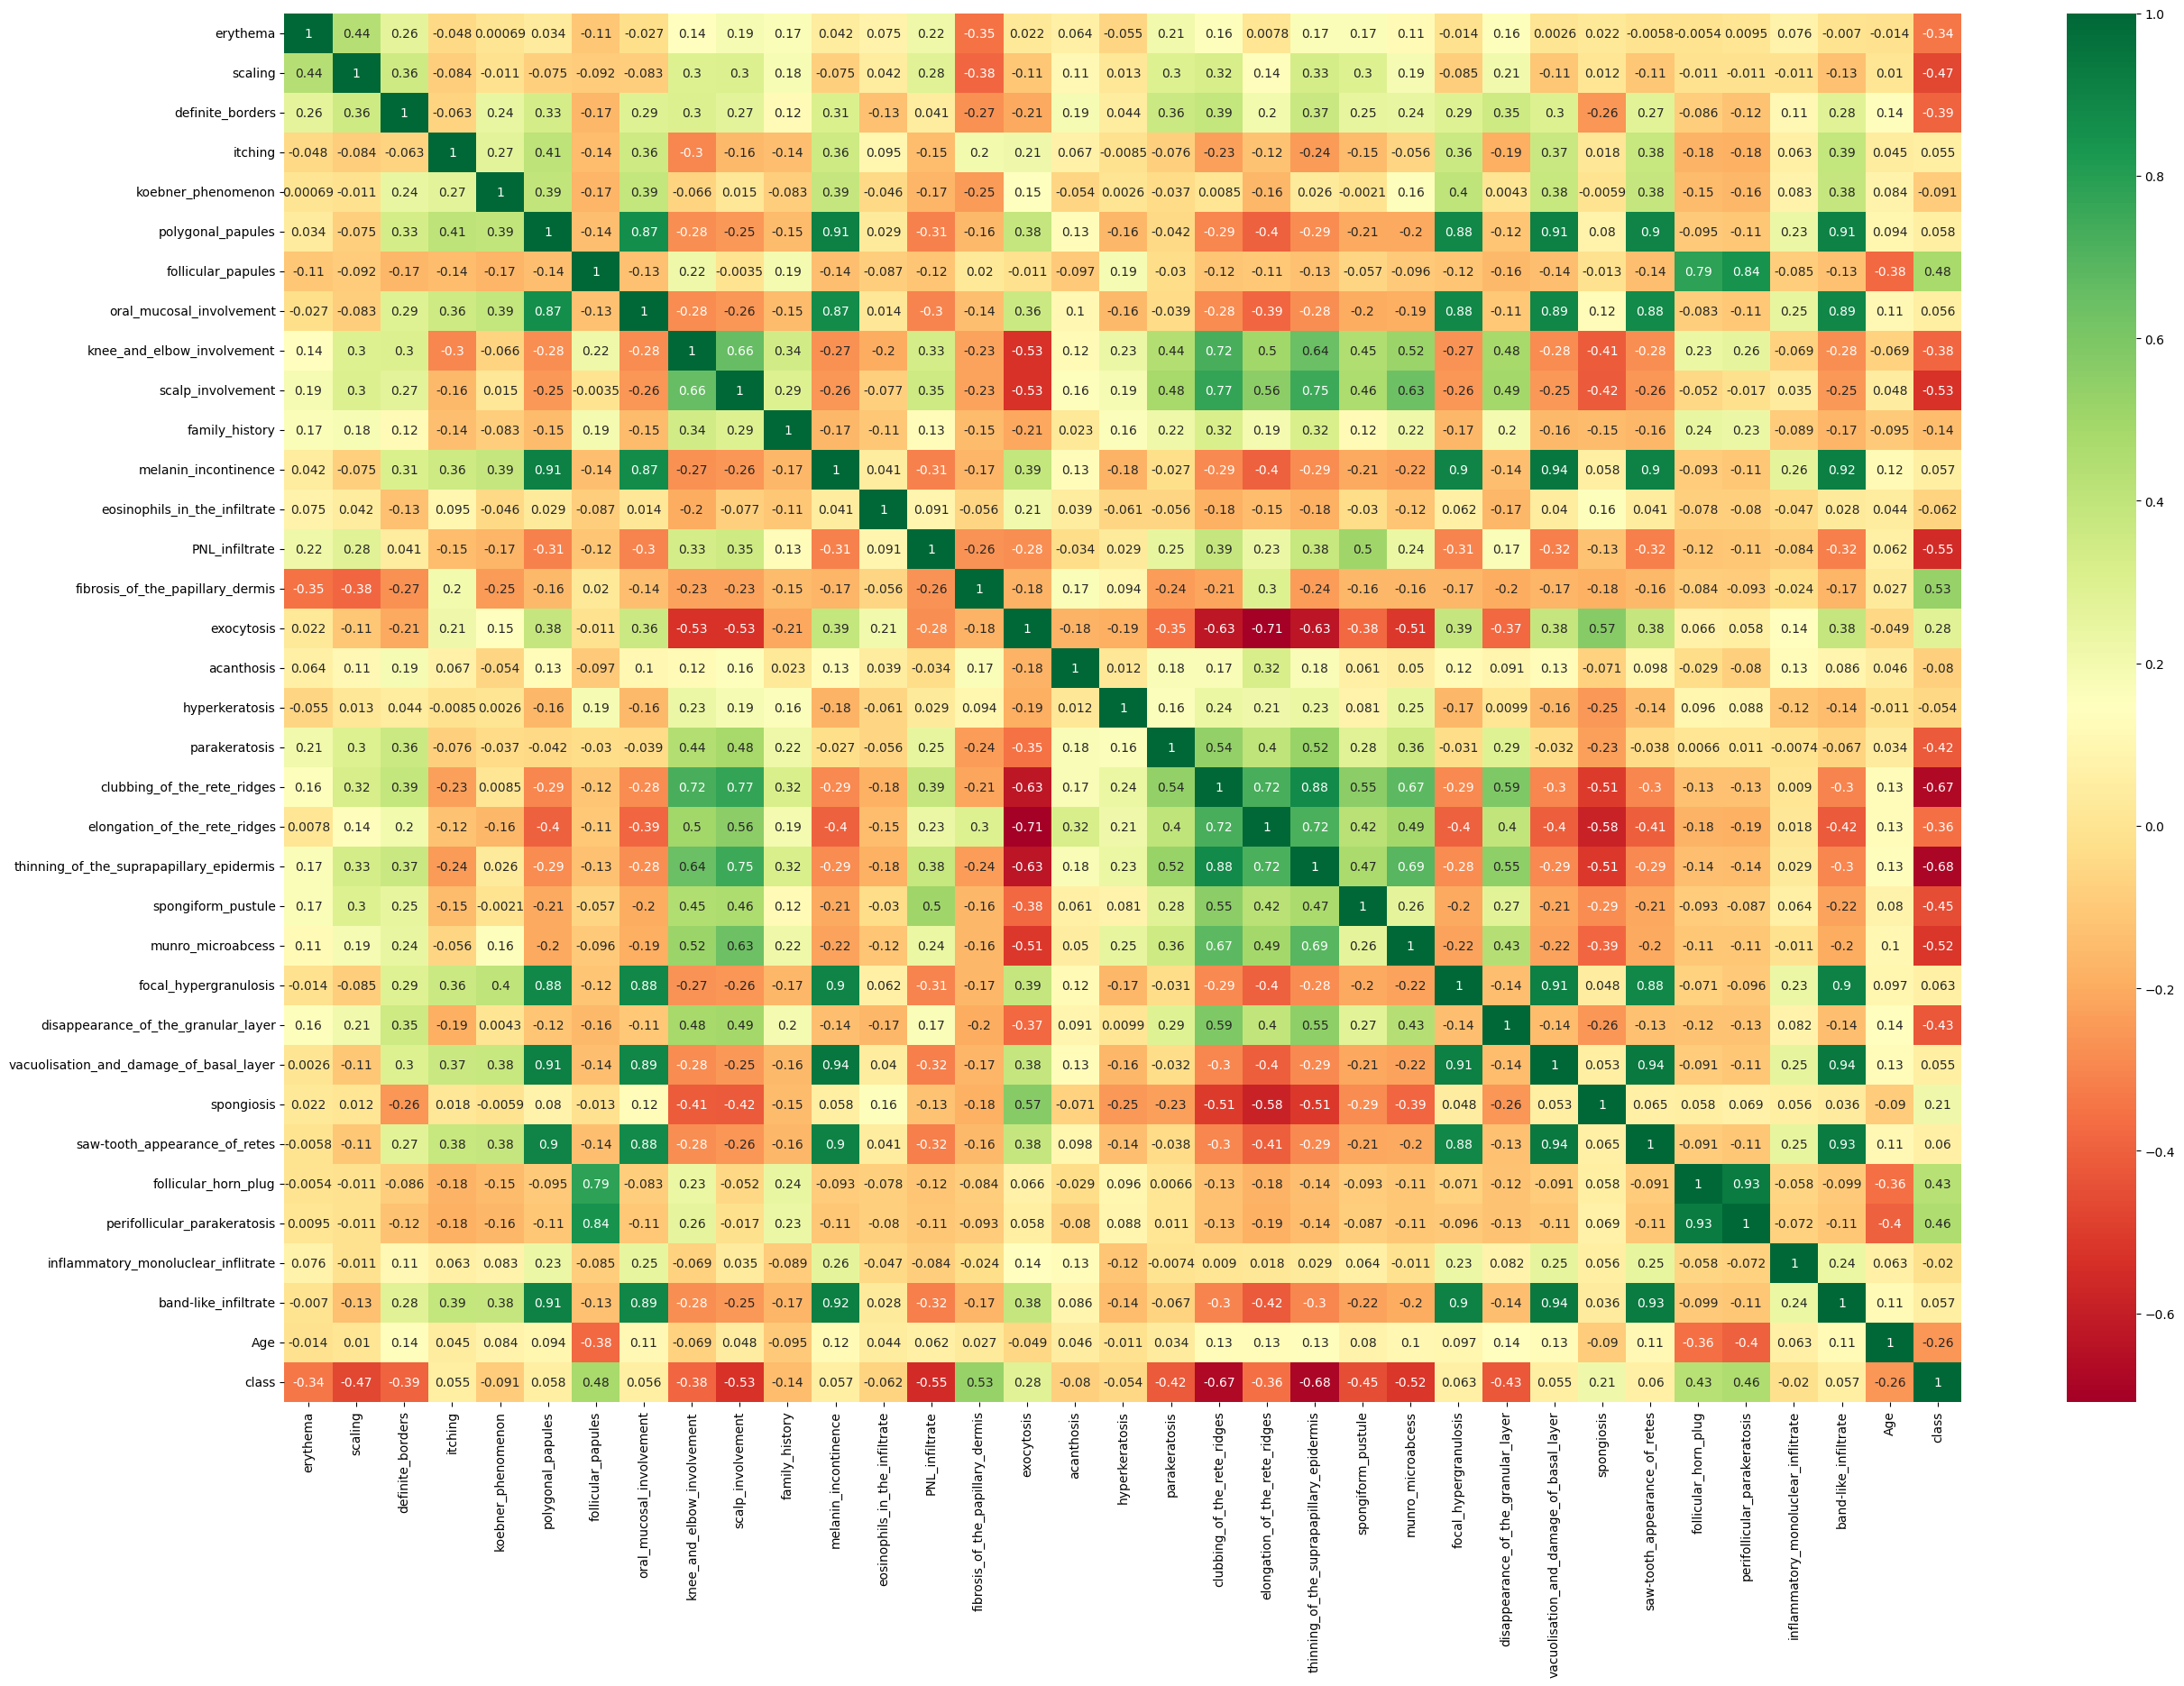

In [76]:
plt.figure(figsize=(30,20))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn',cbar=1.5)
plt.show()

### Insights 
- In this fibrosis_of_the_papillary_dermis column has more correlation with target(class) column.
- second highest correlation with target column are follicular_papules,follicular_horn_plug and perifollicular_parakeratosis columns.
- The least correlation with target column is thinning_of_the_suprapapillary_epidermis.
- 20 columns are negetively correlated with target(class) column and 14 columns are positively correlated with target column.
- The Age attribute is more correlated with focal_hypergranulosis and least correlated with follicular_papules column.

#### Split the Data 

In [39]:
x=new_data.drop('class',axis=1)

In [40]:
x.shape

(366, 34)

In [41]:
y=new_data['class']

In [42]:
y.shape

(366,)

### Split the Data for Training and Testing

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [44]:
X_train.shape

(256, 34)

In [45]:
X_test.shape

(110, 34)

In [46]:
y_train.shape


(256,)

In [47]:
y_test.shape

(110,)

### Model Building

In [48]:
# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Model Evaluation 

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [50]:
from sklearn.model_selection import cross_val_score


### Logistic Regressor

In [132]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [133]:
y_log_train_pred=logistic_model.predict(X_train)# Train Model
y_log_test_pred=logistic_model.predict(X_test)# Test Model

In [134]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score:" , accuracy_score(y_train, y_log_train_pred))
print("Logistic Regression test set score:" , accuracy_score(y_test, y_log_test_pred))


Logistic Regression training set score: 1.0
Logistic Regression test set score: 0.9727272727272728


In [135]:
y_log_test_pred

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 6, 3, 4, 3, 5, 4, 1, 4, 5, 2, 4, 1, 1, 1, 2, 2, 4, 1, 1],
      dtype=int64)

In [55]:
y_test

193    1
33     1
15     4
310    1
57     3
      ..
158    2
229    2
361    4
209    1
329    1
Name: class, Length: 110, dtype: int64

##### Evaluation

In [56]:
recall_score(y_test,y_log_test_pred,average='weighted')

0.9727272727272728

In [57]:
precision_score(y_test,y_log_test_pred,average='weighted')

0.9731474407944997

In [188]:
log_acc_score=accuracy_score(y_test,y_log_test_pred)
log_acc_score

0.9727272727272728

In [59]:
f1_score(y_test,y_log_test_pred,average='weighted')

0.972670276432032

In [60]:
print(classification_report(y_test,y_log_test_pred,target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.88      0.94      0.91        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.87      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110



In [61]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_model,x,y,cv=3,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())


[0.98360656 0.96721311 0.96721311]
Cross validation Score: 0.9726775956284154
Std : 0.007727942963787413


- so Standard_deviation < 0.05% ,so our model is correct.


### K-Neighbors Classifier


In [136]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

##### Evaluation

In [137]:
y_knn_train_pred=knn.predict(X_train) # Training model
y_knn_test_pred=knn.predict(X_test) # Testing Model

In [138]:
#Evaluate knn model:
print("KNN training set score:" , accuracy_score(y_train, y_knn_train_pred))
print("KNN test set score:" , accuracy_score(y_test, y_knn_test_pred))


KNN training set score: 0.921875
KNN test set score: 0.8


In [65]:
precision_score(y_test,y_knn_test_pred,average='weighted')

0.827020202020202

In [66]:
recall_score(y_test,y_knn_test_pred,average='weighted')

0.8

In [190]:
knn_acc_score=accuracy_score(y_test,y_knn_test_pred)
knn_acc_score

0.8

In [67]:
f1_score(y_test,y_knn_test_pred,average='weighted')

0.809056184457254

In [68]:
confusion_matrix(y_test,y_knn_test_pred)

array([[37,  2,  0,  0,  0,  1],
       [ 0, 10,  0,  6,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  4,  0,  9,  2,  0],
       [ 0,  2,  0,  4, 10,  0],
       [ 0,  0,  0,  1,  0,  3]], dtype=int64)

In [69]:
# Classification Report of KNN Classifier Model
print(classification_report(y_test, y_knn_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.93      0.96        40
     seboreic_dermatitis       0.56      0.62      0.59        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.45      0.60      0.51        15
       cronic_dermatitis       0.83      0.62      0.71        16
pityriasis_rubra_pilaris       0.75      0.75      0.75         4

                accuracy                           0.80       110
               macro avg       0.76      0.75      0.75       110
            weighted avg       0.83      0.80      0.81       110



In [70]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,x,y,cv=3,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.86065574 0.85245902 0.90163934]
Cross validation Score: 0.8715846994535519
Std : 0.02151368271587929


In [129]:
error_rate=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y9=knn.predict(X_test)
    error_rate1=(y_test!=y9).sum()/len(y_test)
    error_rate.append(error_rate1)

In [130]:
error_rate

[0.07272727272727272,
 0.11818181818181818,
 0.12727272727272726,
 0.17272727272727273,
 0.2,
 0.20909090909090908,
 0.23636363636363636,
 0.23636363636363636,
 0.24545454545454545,
 0.23636363636363636,
 0.2545454545454545,
 0.24545454545454545,
 0.2545454545454545,
 0.23636363636363636]

Text(0, 0.5, 'ERROR RATE')

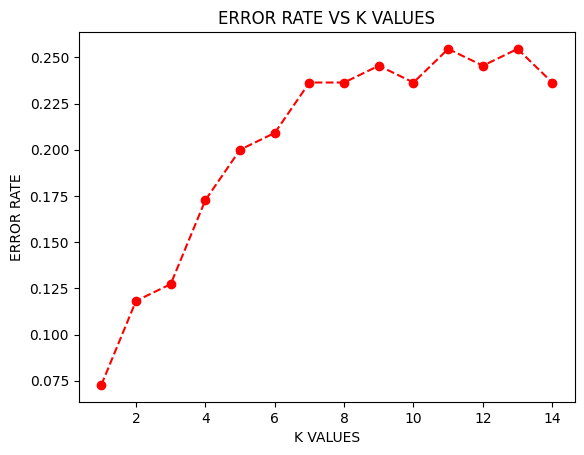

In [131]:
plt.plot(range(1,15),error_rate,color='red',marker='o',linestyle='--')
plt.title('ERROR RATE VS K VALUES')
plt.xlabel('K VALUES')
plt.ylabel("ERROR RATE")

### Support Vector Classifier

In [71]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [72]:
y_svc_train_pred=svc.predict(X_train) # Training model
y_svc_test_pred=svc.predict(X_test) # Testing Model

In [73]:
y_svc_test_pred.shape

(110,)

In [74]:
y_svc_train_pred.shape

(256,)

In [75]:
X_train.shape

(256, 34)

###### Evaluation

In [139]:
#Evaluate SVC model:
print("SVC training set score:" , accuracy_score(y_train, y_svc_train_pred))
print("SVC test set score:" , accuracy_score(y_test, y_svc_test_pred))


SVC training set score: 0.71484375
SVC test set score: 0.7090909090909091


In [77]:
precision_score(y_test,y_svc_test_pred,average='weighted')

0.5925619834710745

In [78]:
recall_score(y_test,y_svc_test_pred,average='weighted')

0.7090909090909091

In [191]:
svc_acc_score=accuracy_score(y_test,y_svc_test_pred)
svc_acc_score

0.7090909090909091

In [79]:
f1_score(y_test,y_svc_test_pred,average='weighted')

0.6277922077922079

In [80]:
confusion_matrix(y_test,y_svc_test_pred)

array([[40,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 4, 12,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

In [81]:
print(classification_report(y_test, y_svc_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.91      1.00      0.95        40
     seboreic_dermatitis       0.36      1.00      0.53        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.00      0.00      0.00        15
       cronic_dermatitis       0.00      0.00      0.00        16
pityriasis_rubra_pilaris       1.00      0.75      0.86         4

                accuracy                           0.71       110
               macro avg       0.55      0.62      0.56       110
            weighted avg       0.59      0.71      0.63       110



In [87]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Hyperparameter Tuning on SVC

In [88]:
# Defining Parameters' ranges for Tuning
params_svc= {'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],
            'random_state':list(range(1,20)),'kernel':['rbf','poly','sigmoid','linear']}

In [89]:
from sklearn.model_selection import  GridSearchCV
grid_search_svc= SVC()
grid_search_svc = GridSearchCV(grid_search_svc, params_svc,cv=5,scoring='accuracy',n_jobs=-1)

grid_result_svc= grid_search_svc.fit(X_train, y_train)
print('Best Params: ', grid_result_svc.best_params_)

Best Params:  {'C': 5, 'gamma': 1, 'kernel': 'linear', 'random_state': 1}


In [141]:
svc_tuned = SVC(C=5, gamma=1, kernel= 'linear', random_state=1)
svc_tuned.fit(X_train, y_train)

SVC(C=5, gamma=1, kernel='linear', random_state=1)

In [142]:
y_svc_train_tuned= svc_tuned.predict(X_train) # training model
y_svc_test_tuned= svc_tuned.predict(X_test) # testing model

In [143]:
#Evaluate Tuned SVC model:
print("SVC Tuned training set score:", accuracy_score(y_train, y_svc_train_tuned))
print("SVC Tuned test set score:", accuracy_score(y_test, y_svc_test_tuned))


SVC Tuned training set score: 1.0
SVC Tuned test set score: 0.9636363636363636


In [192]:
svc_tuned_acc_score=accuracy_score(y_test,y_svc_test_tuned)
svc_tuned_acc_score

0.9636363636363636

In [144]:
# Classification Report of Tuned SVC Model
print(classification_report(y_test, y_svc_test_tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.87      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      0.75      0.86         4

                accuracy                           0.96       110
               macro avg       0.96      0.93      0.94       110
            weighted avg       0.97      0.96      0.96       110



### Decision Tree Classifier

In [147]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
y_tree_train_pred=tree.predict(X_train) 
y_tree_test_pred=tree.predict(X_test)

##### Evaluation

In [149]:
#Evaluate Decision tree model:
print("Decision tree training set score:" , accuracy_score(y_train, y_tree_train_pred))
print("Decision tree test set score:" , accuracy_score(y_test, y_tree_test_pred))


Decision tree training set score: 1.0
Decision tree test set score: 0.9545454545454546


In [97]:
confusion_matrix(y_test,y_tree_test_pred)

array([[40,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  1,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 1,  0,  0,  0,  0,  3]], dtype=int64)

In [193]:
tree_acc_score=accuracy_score(y_test,y_tree_test_pred)
tree_acc_score

0.9545454545454546

In [98]:
print(classification_report(y_test, y_tree_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.98      1.00      0.99        40
     seboreic_dermatitis       0.94      0.94      0.94        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.93      0.93        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      0.75      0.86         4

                accuracy                           0.97       110
               macro avg       0.97      0.94      0.95       110
            weighted avg       0.97      0.97      0.97       110



### Multinomial Naive Bayes Classifier

In [150]:
MNBC = MultinomialNB()
MNBC.fit(X_train, y_train)

MultinomialNB()

In [151]:
y_train_pred_MNBC = MNBC.predict(X_train) # training model
y_test_pred_MNBC = MNBC.predict(X_test) # test model

###### Evaluation

In [152]:
#Evaluate Multinomial Naive Bayes model:
print("Multinomial Naive Bayes training set score:", accuracy_score(y_train, y_train_pred_MNBC))
print("Multinomial Naive Bayes test set score:", accuracy_score(y_test, y_test_pred_MNBC))


Multinomial Naive Bayes training set score: 0.984375
Multinomial Naive Bayes test set score: 0.9818181818181818


In [102]:
recall_score(y_test,y_test_pred_MNBC,average='weighted')

0.9818181818181818

In [103]:
precision_score(y_test,y_test_pred_MNBC,average='weighted')

0.9818181818181818

In [194]:
naive_acc_score=accuracy_score(y_test,y_test_pred_MNBC)
naive_acc_score

0.9818181818181818

In [104]:
f1_score(y_test,y_test_pred_MNBC,average='weighted')

0.9818181818181818

In [105]:
# Classification Report of Multinomial Naive Bayes Model
print(classification_report(y_test, y_test_pred_MNBC, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.94      0.94      0.94        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.93      0.93        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



### Gradient Boosting Classifier

In [153]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [154]:
y_gbc_train_pred=gbc.predict(X_train)
y_gbc_test_pred=gbc.predict(X_test)

##### Evaluation

In [155]:
#Evaluate Gradient Boosting model:
print("Gradient Boosting training set score:" , accuracy_score(y_train, y_gbc_train_pred))
print("Gradient Boosting test set score:" , accuracy_score(y_test, y_gbc_test_pred))


Gradient Boosting training set score: 1.0
Gradient Boosting test set score: 0.9636363636363636


In [109]:
precision_score(y_test,y_gbc_test_pred,average='weighted')

0.9660173160173161

In [110]:
recall_score(y_test,y_gbc_test_pred,average='weighted')

0.9636363636363636

In [195]:
gbc_acc_score=accuracy_score(y_test,y_gbc_test_pred)
gbc_acc_score

0.9636363636363636

In [111]:
f1_score(y_test,y_gbc_test_pred,average='weighted')

0.9641128127943545

In [112]:
confusion_matrix(y_test,y_gbc_test_pred)

array([[40,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  1, 18,  0,  0,  0],
       [ 0,  2,  0, 13,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [113]:
# Classification Report of Gradient Boosting classifier Model
print(classification_report(y_test, y_gbc_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      0.95      0.97        19
        pityriasis_rosea       0.93      0.87      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



### ADA Boost classifier

In [156]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [157]:
y_ada_train_pred=ada.predict(X_train)
y_ada_test_pred=ada.predict(X_test)

##### Evaluation

In [158]:
#Evaluate ADA Boosting model:
print("ADA Boosting training set score:" , accuracy_score(y_train, y_ada_train_pred))
ada_acc_score=print("ADA Boosting test set score:" , accuracy_score(y_test, y_ada_test_pred))


ADA Boosting training set score: 0.44140625
ADA Boosting test set score: 0.4818181818181818


In [197]:
ada_acc_score=accuracy_score(y_test,y_ada_test_pred)
ada_acc_score

0.4818181818181818

In [117]:
# Classification Report of ADA Boosting classifier Model
print(classification_report(y_test, y_ada_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.82      0.90        40
     seboreic_dermatitis       0.00      0.00      0.00        16
           lichen_planus       0.28      1.00      0.44        19
        pityriasis_rosea       0.00      0.00      0.00        15
       cronic_dermatitis       0.11      0.06      0.08        16
pityriasis_rubra_pilaris       0.00      0.00      0.00         4

                accuracy                           0.48       110
               macro avg       0.23      0.31      0.24       110
            weighted avg       0.43      0.48      0.42       110



### Bagging Classifier

In [159]:
bag=BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [160]:
y_bag_train_pred=bag.predict(X_train)
y_bag_test_pred=bag.predict(X_test)

##### Evaluation

In [162]:
#Evaluate bagging classifier model:
print("Bagging classifier training set score:" , accuracy_score(y_train, y_bag_train_pred))
bag_acc_score=print("Bagging classifier test set score:" , accuracy_score(y_test, y_bag_test_pred))


Bagging classifier training set score: 1.0
Bagging classifier test set score: 0.9727272727272728


In [121]:
precision_score(y_test,y_bag_test_pred,average='weighted')

0.972949002217295

In [122]:
recall_score(y_test,y_bag_test_pred,average='weighted')

0.9727272727272728

In [198]:
bag_acc_score=accuracy_score(y_test,y_bag_test_pred)
bag_acc_score

0.9727272727272728

In [123]:
f1_score(y_test,y_bag_test_pred,average='weighted')

0.9721340388007055

In [124]:
# Classification Report of Bagging classifier Model
print(classification_report(y_test, y_bag_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.98      1.00      0.99        40
     seboreic_dermatitis       0.94      0.94      0.94        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.93      0.93        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      0.75      0.86         4

                accuracy                           0.97       110
               macro avg       0.97      0.94      0.95       110
            weighted avg       0.97      0.97      0.97       110



### Random Forest Classifier

In [163]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [164]:
y_rfc_train_pred=rfc.predict(X_train)
y_rfc_test_pred=rfc.predict(X_test)

#### Evaluation

In [165]:
#Evaluate Random forest classifier model:
print("Random forest classifier training set score:" , accuracy_score(y_train, y_rfc_train_pred))
print("Random forest classifier test set score:" , accuracy_score(y_test, y_rfc_test_pred))


Random forest classifier training set score: 1.0
Random forest classifier test set score: 0.9636363636363636


In [128]:
precision_score(y_test,y_rfc_test_pred,average='weighted')

0.9652680652680653

In [129]:
recall_score(y_test,y_rfc_test_pred,average='weighted')

0.9636363636363636

In [199]:
rfc_acc_score=accuracy_score(y_test,y_rfc_test_pred)
rfc_acc_score

0.9636363636363636

In [130]:
f1_score(y_test,y_rfc_test_pred,average='weighted')

0.96340718105424

In [131]:
# Classification Report of random forest classifier Model
print(classification_report(y_test, y_rfc_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.92      0.80      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



### eXtreme Gradient Boosting classifier

In [106]:
data['class'].replace(['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'],[0,1,2,3,4,5], inplace=True)

In [107]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

In [108]:
x1=data.drop('class',axis=1)

In [109]:
y1=data['class']

In [110]:
x_train,x_test,Y_train,Y_test=train_test_split(x1,y1,random_state=42,test_size=0.3)

In [166]:
xgb=XGBClassifier()
xgb.fit(x_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [167]:
y_xgb_train_pred=xgb.predict(x_train)
y_xgb_test_pred=xgb.predict(x_test)


##### Evaluation

In [168]:
#Evaluate XGB classifier model:
print("XGB classifier training set score:" , accuracy_score(Y_train, y_xgb_train_pred))
print("XGB classifier test set score:" , accuracy_score(Y_test, y_xgb_test_pred))


XGB classifier training set score: 1.0
XGB classifier test set score: 0.9636363636363636


In [114]:
precision_score(Y_test,y_xgb_test_pred,average='weighted')

0.9652680652680653

In [115]:
recall_score(Y_test,y_xgb_test_pred,average='weighted')

0.9636363636363636

In [200]:
xgb_acc_score=accuracy_score(Y_test,y_xgb_test_pred)
xgb_acc_score

0.9636363636363636

In [116]:
f1_score(Y_test,y_xgb_test_pred,average='weighted')

0.96340718105424

In [117]:
confusion_matrix(Y_test,y_xgb_test_pred)

array([[40,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  3,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [118]:
# Classification Report of XGB classifier Model
print(classification_report(Y_test, y_xgb_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.92      0.80      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



### Artificial Neural Networks Classifier

In [169]:
# model creation
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron
ann = MLPClassifier()
ann.fit(X_train,y_train)

MLPClassifier()

In [170]:
y_ann_train_pred=ann.predict(X_train)
y_ann_test_pred=ann.predict(X_test)

##### Evaluation

In [172]:
#Evaluate ANN classifier model:
print("ANN classifier training set score:" , accuracy_score(y_train, y_ann_train_pred))
print("ANN classifier test set score:" , accuracy_score(y_test, y_ann_test_pred))


ANN classifier training set score: 0.98828125
ANN classifier test set score: 0.9727272727272728


In [122]:
precision_score(y_test,y_ann_test_pred,average='weighted')

0.9731474407944997

In [123]:
recall_score(y_test,y_ann_test_pred,average='weighted')

0.9727272727272728

In [201]:
ann_acc_score=accuracy_score(y_test,y_ann_test_pred)
ann_acc_score

0.9727272727272728

In [124]:
f1_score(y_test,y_ann_test_pred,average='weighted')

0.972670276432032

In [125]:
confusion_matrix(y_test,y_ann_test_pred)

array([[40,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  2,  0, 13,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [126]:
# Classification Report of ANN classifier Model
print(classification_report(y_test, y_ann_test_pred, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.88      0.94      0.91        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.87      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110



erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

### All algorithms Accuracy Score

In [202]:
scores=[log_acc_score,knn_acc_score,svc_acc_score,svc_tuned_acc_score,tree_acc_score,naive_acc_score,gbc_acc_score,ada_acc_score,bag_acc_score,rfc_acc_score,xgb_acc_score,ann_acc_score]
algorithms=["Logistic Regression","KNN","SVC","Hyperparameter SVC","Decision Tree","Naive Bayes","Gradient Boosting","ADA","Bagging","Random Forest","XGB",'ANN']
for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The Accuracy score achieved using Logistic Regression is: 0.9727272727272728%
The Accuracy score achieved using KNN is: 0.8%
The Accuracy score achieved using SVC is: 0.7090909090909091%
The Accuracy score achieved using Hyperparameter SVC is: 0.9636363636363636%
The Accuracy score achieved using Decision Tree is: 0.9545454545454546%
The Accuracy score achieved using Naive Bayes is: 0.9818181818181818%
The Accuracy score achieved using Gradient Boosting is: 0.9636363636363636%
The Accuracy score achieved using ADA is: 0.4818181818181818%
The Accuracy score achieved using Bagging is: 0.9727272727272728%
The Accuracy score achieved using Random Forest is: 0.9636363636363636%
The Accuracy score achieved using XGB is: 0.9636363636363636%
The Accuracy score achieved using ANN is: 0.9727272727272728%


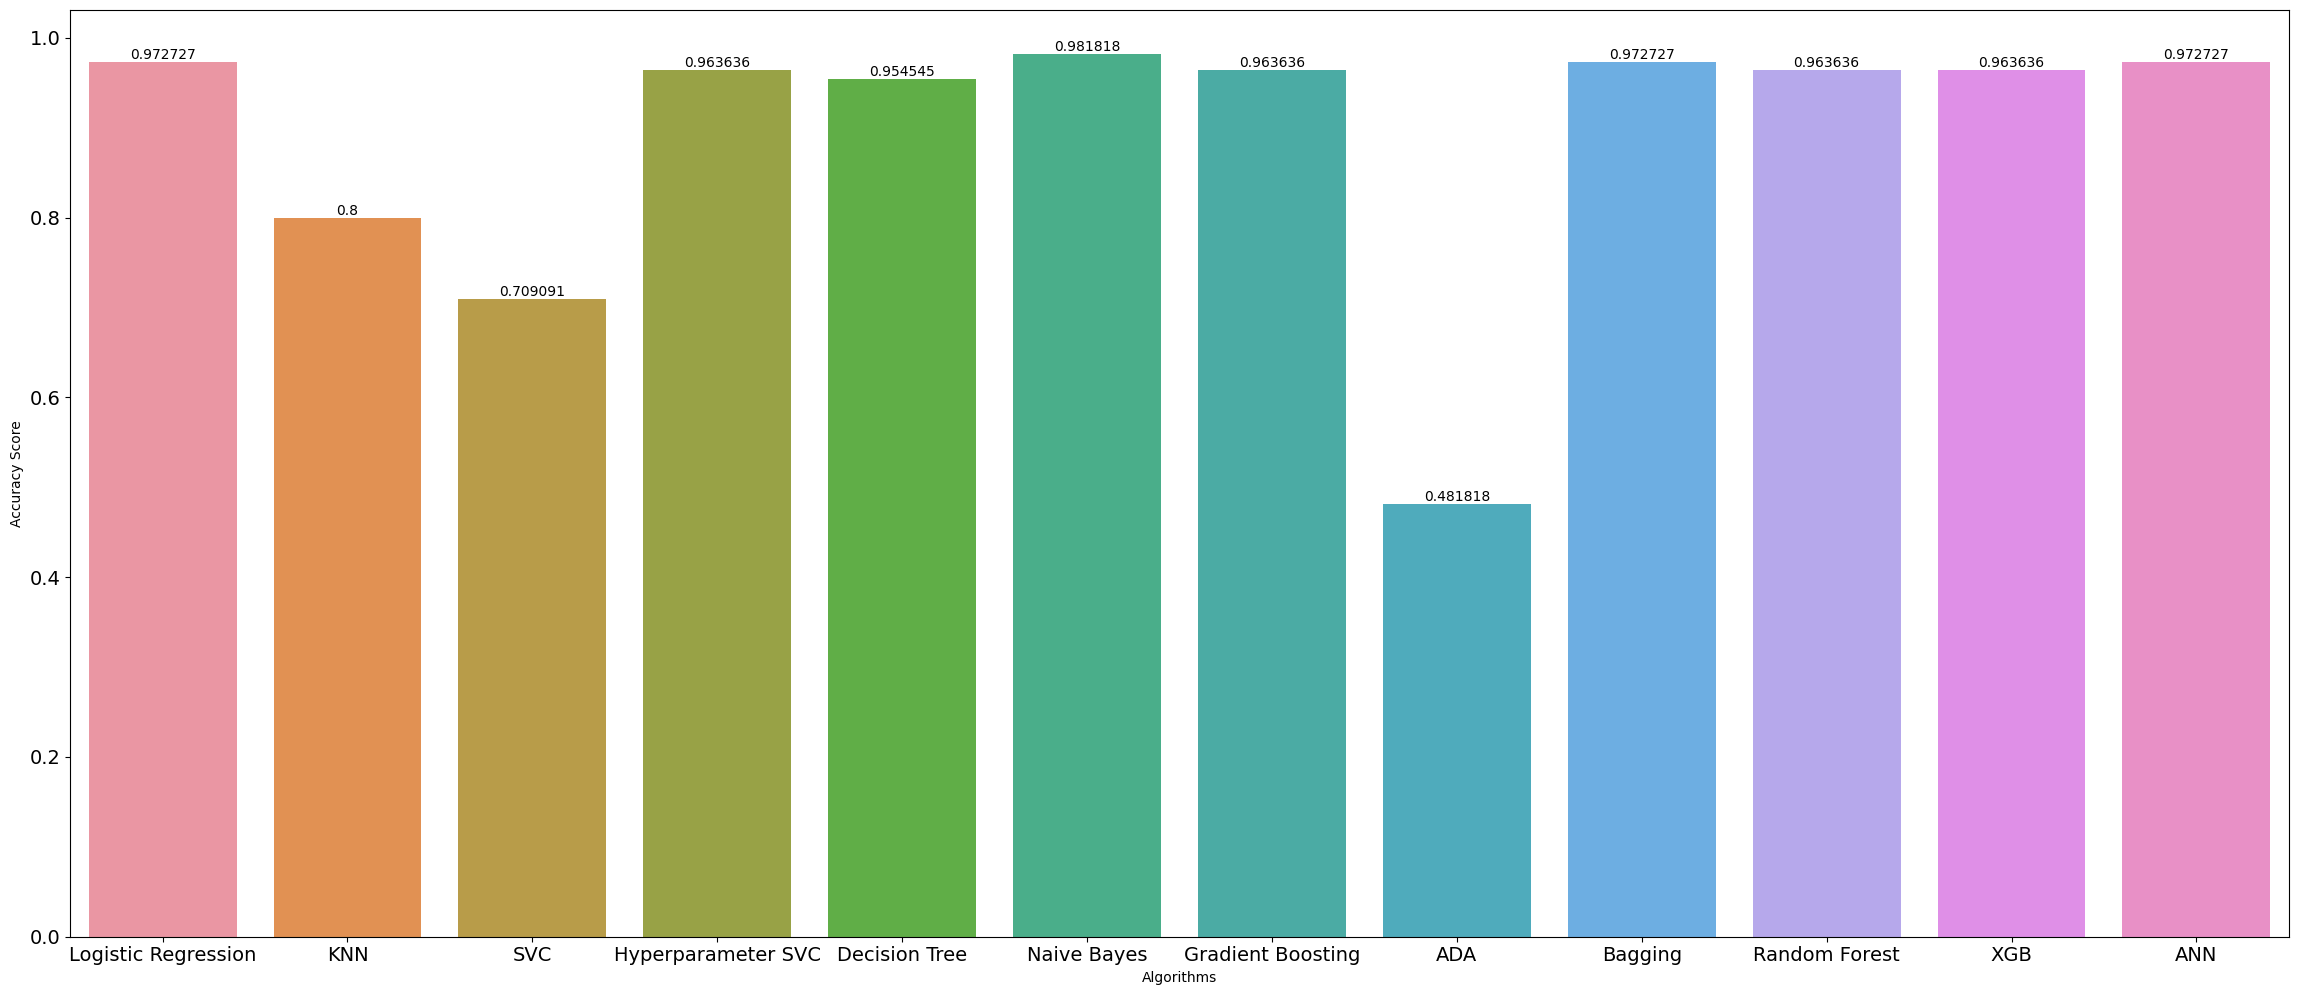

In [211]:
plt.figure(figsize=(23,10))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
bars=sns.barplot(x=algorithms,y=scores)
for column in bars.containers:
    bars.bar_label(column)
plt.tight_layout()
plt.tick_params(labelsize=14)

## PCA Technique(Prinicipal Component Analysis)

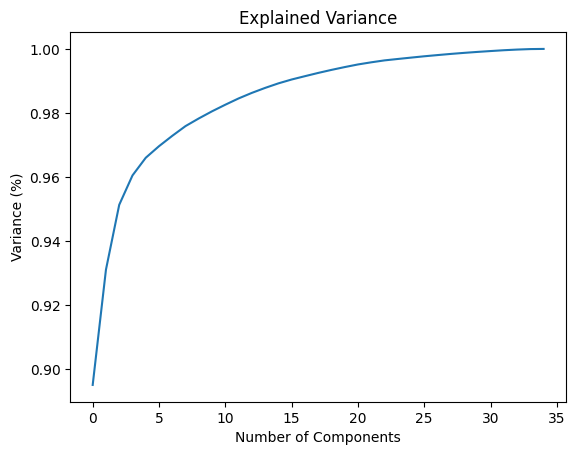

In [32]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

#### Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(data)

StandardScaler()

In [34]:
scaled_data=scalar.transform(data)

In [35]:
scaled_data

array([[-0.1028946 ,  0.29250271, -1.70937509, ..., -0.50221531,
         1.24105006, -0.50342761],
       [ 1.40348234,  1.71991595,  1.60084334, ..., -0.50221531,
        -1.88877593, -1.13014361],
       [-0.1028946 , -1.13491053,  0.49743719, ...,  2.2142005 ,
        -0.69011917,  0.12328839],
       ...,
       [ 1.40348234,  0.29250271,  0.49743719, ...,  2.2142005 ,
        -0.55693509,  0.12328839],
       [-0.1028946 , -1.13491053,  1.60084334, ...,  2.2142005 ,
         0.90808985,  0.12328839],
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.50221531,
        -0.09079079, -1.13014361]])

#### Apply PCA algorithm

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)


In [48]:
data_pca=pca.fit_transform(scaled_data)

In [49]:
data_pca

array([[-0.95453838,  2.12184396, -1.57749157, -1.46992768,  0.38684389,
         0.18260256],
       [ 3.43197994, -1.89337543,  0.88647273, -1.37594539, -0.34358079,
         1.22918218],
       [-5.07119538, -2.45532055,  0.67551657,  0.31004545, -0.04870037,
         0.05173912],
       ...,
       [-6.03101834, -3.4926164 ,  0.45933251, -0.86486941, -1.08067239,
         2.45099735],
       [-5.28016055, -2.87914991,  0.45542998,  0.60759607,  0.85835951,
        -0.86176828],
       [ 4.83001501, -2.85062106,  0.60603007, -0.03715244, -0.26303313,
        -1.84445695]])

In [50]:
pca.explained_variance_

array([9.45474518, 5.92107874, 3.17566973, 2.39519064, 1.35164923,
       1.2225826 ])

In [51]:
data.keys()

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

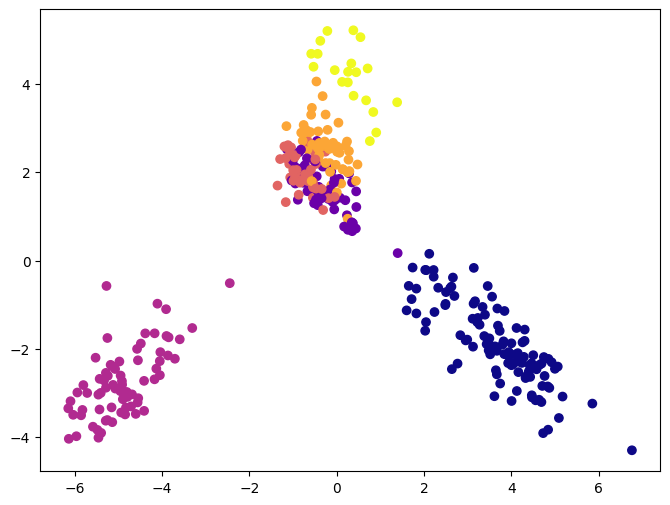

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['class'], cmap='plasma')
plt.show()


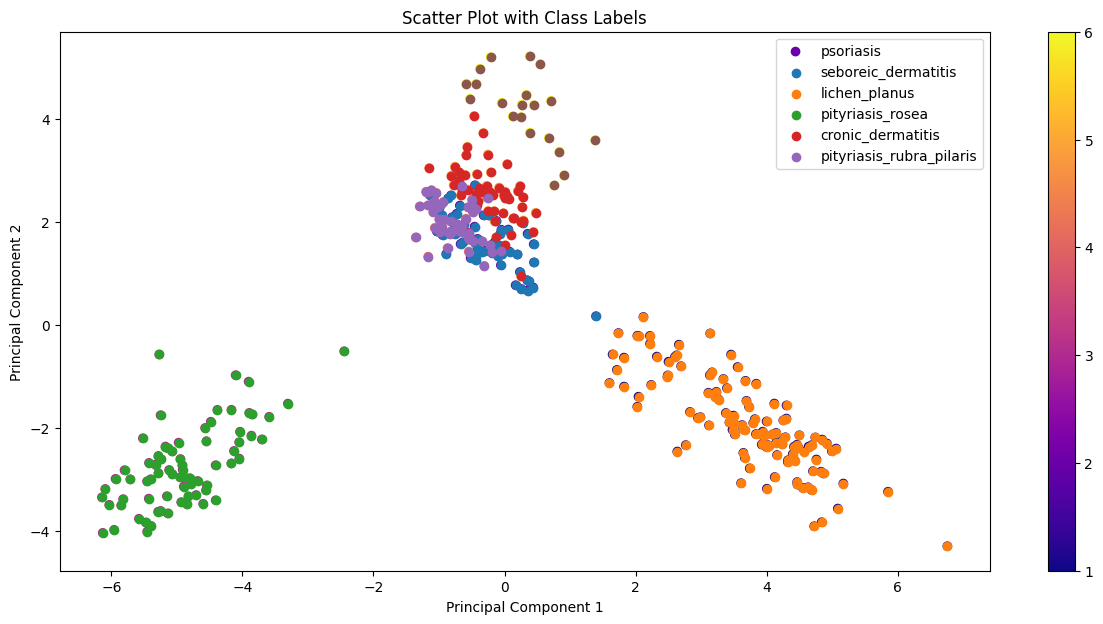

In [71]:
# Create a PCA object with 2 components for 2D visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_pca)

# Now,create a scatter plot with color-coding based on class labels
plt.figure(figsize=(15,7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data['class'], cmap='plasma')
plt.colorbar()  # Add a colorbar to indicate class labels
plt.title("Scatter Plot with Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# to display target names,do in a loop
for i, target_name in enumerate(data['class'].unique()):
    indices = data[data['class'] == target_name].index
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=target_name)

# Define the target names
target_names = data['class'].unique()

# Create a list of labels for the legend
legend_labels = ['psoriasis', 'seboreic_dermatitis', 'lichen_planus', 'pityriasis_rosea', 'cronic_dermatitis', 'pityriasis_rubra_pilaris']

# Now, create the legend using the legend_labels
plt.legend(legend_labels)

plt.show()


### SUMMARY
**The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.**

**The Primary objective is to build a machine learning techniques, which can effectively differentiate skin disease classification.**

### METHODOLOGY FOLLOWED
**The dataset contains 12 clinical features and 22 histopathological features, the feature family history has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.**

**Exploratory data analysis has been carried out on each features and their relationship with other features.**

**The age feature had NAN values and zero values which was handled using the median of the age feature.**

**Correlation of the features has been captured using heatmap.**

### INSIGHTS FROM EDA:
**The distribution of 12 clinical features and 22 histopathological features in the dataset with 366 instances is depicted using histogram and KDE plot.**

**Dieseases like Lichen_Planus, Cronic_Dermatitis,and Pityriasis_Rosea does not show any relation of tranfer within family members. Also, theses diseases can occurs in early ages till the age of 70 years is also as seen from the distribution.**

**Diseases like Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family and disease Seboreic_Dermatitis too shows a some relation of transfer within family members.**

**Disease like Pityriasis_rubra_pilaris shows its presence in early ages and till the age of 15 to 20 years only.**

**Diseases like Psoriasis and Seboreic_Dermatitis shows its presence in early ages and till the age of 70 years.**

**The Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using combination of SMOTE and edited nearest neighbor technique.**

**Heatmap is used to find the correlation between the features too.**

### INSIGHTS FROM CLASSIFICATION MODELS:
#### Model-1: Logistic Classifier
For the tuned Logistic classifer model, the accuracy score for train and test data were 1 and 0.972727 respectively.
#### Model-2: KNN Classifier
For the tuned KNN classifer model, the accuracy score for train and test data were 0.9218 and 0.80 respectively.
#### Model-3: Support Vector Classifier
For Support Vector classifer model, the accuracy score for train and test data were 0.7148 and 0.7090 respectively.
#### Model-4: Hyper parameter Support Vector Classifier
For Hyper parameter Support Vector classifer model, the accuracy score for train and test data were 1 and 0.9636 respectively.
#### Model-5: Desicion Tree Classifier
For Desicion Tree classifer model, the accuracy score for train and test data were 1 and 0.9545 respectively.

#### Model-6: Multinomial Naive Bayes Classifier
For Multinomial Naive Bayes classifer model, the accuracy score for train and test data were 0.984 and 0.981 respectively.
#### Model-7: Gradient Boost Classifier
For Gradient Boost classifer model, the accuracy score for train and test data were 1 and 0.9636 respectively.

#### Model-8: ADA Boost Classifier
For ADA Boost classifer model, the accuracy score for train and test data were 0.4414 and 0.4818 respectively.
#### Model-9: Bagging Classifier
For Bagging classifer model, the accuracy score for train and test data were 1 and 0.9727 respectively.
#### Model-10: Random Forest Classifier
For Random Forest classifer model, the accuracy score for train and test data were 1 and 0.9636 respectively.


#### Model-11: XGB Classifier
For XGB classifer model, the accuracy score for train and test data were 1 and 0.9636 respectively.
#### Model-12: ANN Classifier
For ANN classifier model, the accuracy score for train and test data were 0.98828 and 0.9727 respectively.

### CONCLUSION:
**Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.**

**From EDA, skin diseases Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family members and disease Seboreic_Dermatitis too shows a some relation of transfer within family members. Skin disease like Pityriasis_rubra_pilaris shows its presence in early ages till the age of 15 to 20 years only. Skin diseases Psoriasis and Seboreic_Dermatitis shows its presence in early ages till the age of 70 years.**

**The 12 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.**

**The Multinominal Naive Bayes classifier Model has given a better accuracy Score and F1 Score compared to other classifier models and hence recommend to use Multinominal Naive Bayes classifier Model in order for the doctors to identify the skin diseases of the patient at the earliest.**

### Implementing a Naive Bayes classifier for skin disease identification can be a useful tool to aid doctors in the early detection and diagnosis of skin conditions, but it should be used as a complementary tool to the clinical judgment of medical professionals. Regular updates, validation, and collaboration with healthcare providers are essential for the success of such a system.

### CHALLENGES FACED:
**The age feature had NAN and zero values which were replaced using the median of the age feature.**

**Various classifier models were studied and evaluated using accuracy score, classification report and confusion matrix.**

**The model with highest accuracy score and F1 Score was obtained in Multinominal Naive Bayes classifier and hence will be the deciding factor.**